# ***TWITTER SENTIMENT ANALYSIS***

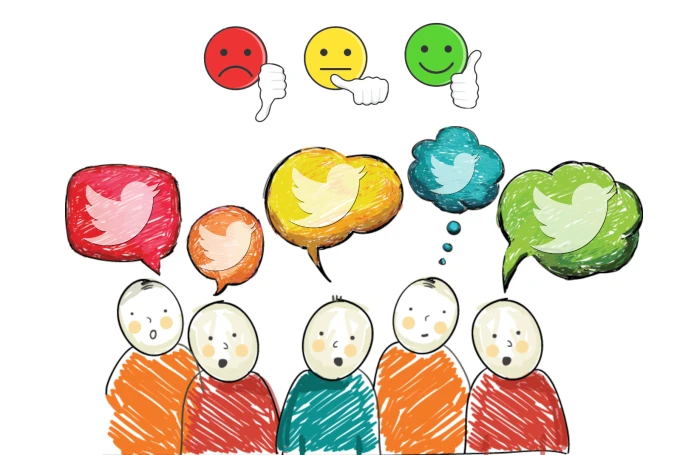

In [1]:
from IPython.display import Image
img = "twitter.png"
Image(img)

### Source -> kaggle.com

# ***1.Introduction***

## **1.1) Objective**

The primary objective of this project, titled *"Twitter Sentiment Analysis,"* is to analyze a dataset of tweets to determine the sentiment expressed in them. The goal is to classify the tweets into three sentiment categories: positive, negative, and neutral. This analysis will help in understanding public opinion on various topics, tracking changes in sentiment over time, and identifying key factors influencing sentiment.


## **1.2) Dataset Overview**

### **1.2.1) About the Dataset**

The dataset used for this project is the *Sentiment140 dataset,* which contains 1,600,000 tweets labeled with sentiment annotations. 

- *Size:* 1,600,000 tweets
- *Source:* Twitter
- *Year:* 2009
- *Sentiment Labels:* 0 = negative, 2 = neutral, 4 = positive


### **1.2.2) Input variables**

1. **target:** Integer representing the sentiment of the tweet.
   - 0: Negative sentiment
   - 2: Neutral sentiment
   - 4: Positive sentiment

2. **date:** The date and time when the tweet was posted.

3. **flag:** This column contains information about the query used, but for most tweets, the value is "NO_QUERY." It is not relevant to the analysis and was removed during data cleaning.

4. **user:** The username of the person who posted the tweet. This column was also removed as it is not relevant to sentiment analysis.

5. **text:** The content of the tweet. This is the primary feature used for sentiment analysis.

Additional variables were created during the data cleaning and preprocessing steps:

- **text_length:** The length of each tweet.
- **cleaned_text:** The preprocessed version of the tweet text, with stop words, special characters, and URLs removed.
- **processed_text:** The final processed version of the tweet text.
- **year, month, week, day of the week:** Date-related columns created for temporal analysis.


# ***2.Data Import and Exploration***

## **2.1) Import Libraries and Load Dataset**

- **Pandas**: Provides data structures and functions for efficiently manipulating large datasets.
- **Numpy**: Supports numerical operations and mathematical functions on arrays.
- **Matplotlib.pyplot**: Enables creation of static, interactive, and animated visualizations.
- **Seaborn**: Builds on Matplotlib to provide a high-level interface for attractive and informative statistical graphics.
- **Chardet**: Detects the character encoding of text files to ensure proper reading and processing of data.

In [2]:
# import neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

In [3]:
# load dataset 
# Facing UnicodeDecodeError 'utf-8'
# In order to handle this, error detecting encodings

import pandas as pd
file_path = "twitter_sentiment.csv"

# Try common encodings

encodings = ['utf-8', 'ISO-8859-1', 'latin1', 'cp1252']
for encoding in encodings:
    try:
        tweet = pd.read_csv(file_path, encoding=encoding)
        print(f"Successfully loaded with encoding: {encoding}")
        print(tweet.head()) # Print the first few rows of the dataframe
        break
    except Exception as e:
        print(f"Error with encoding {encoding}: {e}")

Error with encoding utf-8: 'utf-8' codec can't decode bytes in position 80-81: invalid continuation byte
Successfully loaded with encoding: ISO-8859-1
   0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
0  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
1  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
2  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
3  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
4  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update his Facebook by ...                                                                   
1  @Kenichan I dived many times for the ball. Man...                                                                   
2    my whole body feels itchy a

- **Problem:** -->  A `UnicodeDecodeError` occurred when loading the dataset, indicating that the default utf-8 encoding was not compatible with the file's actual encoding.
- **Solution:** -->  A loop was implemented to try loading the dataset with various common encodings (utf-8, ISO-8859-1, latin1, cp1252). The loop attempts each encoding until the file is successfully loaded.
- **Outcome:** --> The dataset was successfully loaded using one of the tested encodings, which was confirmed by printing the first few rows of the dataframe using the head() method.

In [4]:
# Reading file with errors handling

file_path = 'twitter_sentiment.csv'

try:
    with open(file_path, 'r', encoding='utf-8', errors='replace') as file:
        data = file.read()
    print(data[:500]) # Print the first 500 characters of the content
except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}")

"0","1467810369","Mon Apr 06 22:19:45 PDT 2009","NO_QUERY","_TheSpecialOne_","@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"
"0","1467810672","Mon Apr 06 22:19:49 PDT 2009","NO_QUERY","scotthamilton","is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"
"0","1467810917","Mon Apr 06 22:19:53 PDT 2009","NO_QUERY","mattycus","@Kenichan I dived many times for the ball. Ma


- **Problem:** --> When reading the file with the `utf-8` encoding, there may be characters that cause a` UnicodeDecodeError`, potentially halting the process.
- **Solution:** --> The file was opened with `errors='replace'` in the encoding, which replaces problematic characters with a replacement marker (usually �), allowing the rest of the file to be read without issues.
- **Outcome:** --> The `first 500 characters` of the file content were successfully printed, providing an initial look at the data.


In [5]:
tweet.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


- The dataset was initially loaded with generic column names that needed to be `renamed for clarity`. The following steps were taken to import the dataset and assign `meaningful column names`

In [6]:
tweet.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

- The output revealed columns with names like `0, 1467810369, Mon Apr 06 22:19:45 PDT 2009, etc.,` indicating that the dataset required renaming for `better understanding.`


In [7]:
# Import the column names

tweet.columns = ["target","Ids","date","flag","user","text"]
tweet.head()

,target,Ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


- The columns were renamed to more descriptive names for better `readability and analysis`
  
 **Verification:**

- To verify the renaming process, the `first few rows` of the dataframe were printed
- This confirmed that the columns were `renamed correctl` and the data now has `meaningful labels.`

## **2.2) Examine structure**

**Head and Tail :**

**Head** - Shows the first few rows of the DataFrame.
**Tail** - Displays the last few rows of the DataFrame.


In [8]:
# Display the first few rows of the dataset

tweet.head(10)

,target,Ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


In [9]:
# Display the last few rows of the dataset

tweet.tail(10)

,target,Ids,date,flag,user,text
1599989,4,2193579249,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,razzberry5594,WOOOOO! Xbox is back
1599990,4,2193579284,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,AgustinaP,@rmedina @LaTati Mmmm That sounds absolutely ...
1599991,4,2193579434,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,sdancingsteph,ReCoVeRiNg FrOm ThE lOnG wEeKeNd
1599992,4,2193579477,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,ChloeAmisha,@SCOOBY_GRITBOYS
1599993,4,2193579489,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,EvolveTom,"@Cliff_Forster Yeah, that does work better tha..."
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


## **2.3) Column names and dtypes**

- **Columns**: Lists all column names in the dataset to identify available features.
- **dtypes**: Shows the data type of each column to understand how different data types are handled and to guide preprocessing steps.

In [10]:
# Display the column names

tweet.columns

Index(['target', 'Ids', 'date', 'flag', 'user', 'text'], dtype='object')

- **target:** The sentiment label of the tweet.
- **Ids:** The identifier for the tweet.
- **date:** The timestamp of when the tweet was posted.
- **flag:** The query used or 'NO_QUERY' if no query was applied.
- **user:** The username of the person who posted the tweet.
- **text:** The content of the tweet.


In [11]:
# Display the Datatypes of each colummn

print("Data Types:")
print(tweet.dtypes)

Data Types:
target     int64
Ids        int64
date      object
flag      object
user      object
text      object
dtype: object


- **target:** `int64` - Represents the sentiment label of the tweet (numerical values).
- **Ids:** `int64` - Represents the identifier for the tweet (numerical values).
- **date:** `object` - Represents the date and time when the tweet was posted (should be converted to a datetime type for analysis).
- **flag:** `object` - Represents the query used to retrieve the tweet or 'NO_QUERY' if no query was used (categorical text data).
- **user:** `object` - Represents the username of the person who posted the tweet (text data).
- **text:** `object` - Represents the content of the tweet (text data).

## **2.4) Examine size**

In [12]:
# Display the number of rows and columns

print("Shape of the Dataset")
tweet.shape

Shape of the Dataset


(1599999, 6)

**Displaying the Number of Rows and Columns**

To determine the dimensions of the dataset, including the number of rows and columns

- **Number of Rows:** `1,599,999` - This represents the total number of individual records or tweets in the dataset.
- **Number of Columns:** `6` - This represents the total number of features (columns) in the dataset.


In [13]:
# Total number of rows

print("Number of rows:",
tweet.shape[0])

Number of rows: 1599999


- **Number of Rows:** `1,599,999` - This represents the total number of individual records or tweets in the dataset.

In [14]:
# Total number of columns

print("Number of columns:",
tweet.shape[1])

Number of columns: 6


- **Number of Columns:** `6` - This represents the total number of features (columns) in the dataset.

## **2.5) Examine features**

In [15]:
# Dataset information

tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   Ids     1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


- **Total Entries:** `1,599,999` - This is the total number of rows in the dataset.
- **Columns:** `6` - Total number of columns.
- **Column Details:**
  - **target:** `int64` data type.
  - **Ids:**  `int64` data type.
  - **date:**  `object` data type (should be converted to `datetime` for better analysis).
  - **flag:** `object` data type.
  - **user:**  `object` data type.
  - **text:**  `object` data type.
- **Memory Usage:** `73.2+ MB` - The approximate memory usage of the dataset.

In [16]:
# Descriptive Statistics for numeric values

tweet.describe()

,target,Ids
count,1.599999e+06,1.599999e+06
mean,2.000001e+00,1.998818e+09
std,2.000001e+00,1.935757e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.956916e+09
50%,4.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


- **Ids:**
  - *Count:*----> `1,599,999` - Total number of non-null entries.
  - *Mean:* ----> `2.00` - Average value.
  - *Standard Deviation (std):* ----> `2.00` - Measure of dispersion.
  - *Min:* ----> `0` - Minimum value.
  - *25th Percentile (25%):*-----> `0` - Value below which 25% of the data falls.
  - *50th Percentile (50%):*----->  `4` - Median value.
  - *75th Percentile (75%):*-----> `4` - Value below which 75% of the data falls.
  - *Max:* ----> `4` - Maximum value.

- **target:**
  - *Count:*----> `1,599,999` - Total number of non-null entries.
  - *Mean:*----> `1,998,818,000` - Average value.
  - *Standard Deviation (std):*----> `193,575,700` - Measure of dispersion.
  - *Min:* -----> `1,467,811,000` - Minimum value.
  - *25th Percentile (25%):* ----> `1,956,916,000` - Value below which 25% of the data falls.
  - *50th Percentile (50%):* ----> `2,002,102,000`- Median value.
  - *75th Percentile (75%):*----> `2,177,059,000` - Value below which 75% of the data falls.
  - *Max:* -----> `2,329,206,000 `- Maximum value.

## **2.6) Identify Key variables**

### **2.6.1) Tweet Content(text)**

In [17]:
# View sample text

tweet['text'].head()

0    is upset that he can't update his Facebook by ...
1    @Kenichan I dived many times for the ball. Man...
2      my whole body feels itchy and like its on fire 
3    @nationwideclass no, it's not behaving at all....
4                        @Kwesidei not the whole crew 
Name: text, dtype: object

- The command *`tweet['text'].head()`* displays the first few entries in the text column of the dataset.
- This helps to quickly preview the tweet contents and ensure that the text data is being read correctly.

### **2.6.2) Timestamp(date)**

In [18]:
# View sample date

tweet['date'].head()

0    Mon Apr 06 22:19:49 PDT 2009
1    Mon Apr 06 22:19:53 PDT 2009
2    Mon Apr 06 22:19:57 PDT 2009
3    Mon Apr 06 22:19:57 PDT 2009
4    Mon Apr 06 22:20:00 PDT 2009
Name: date, dtype: object

- The command *`tweet['date'].head()`* shows the first few entries in the date column of the dataset.
- This allows to verify the format and content of the date information and ensure it has been imported correctly.

### **2.6.3) Sentiment Labels(target)**

In [19]:
# View Sentiment label distribution

tweet['target'].value_counts()

target
4    800000
0    799999
Name: count, dtype: int64

- The command *`tweet['target'].value_counts()`* counts the number of occurrences of each unique value in the target column.
- This helps to understand the distribution of sentiment labels (e.g., positive, negative, neutral) in the dataset.

In [20]:
# View Sample tweets with sentiment labels

tweet[['text','target']].sample(5)

,text,target
336165,I can't believe I slept so late. I've a hair a...,0
646855,Finally going home.. I have a stuffy nose.,0
517729,Please say it ain't so! Please don't let Farve...,0
335034,Coming to terms with the fact that all of us h...,0
12313,@twotonedc The Estate? What's that? Really do...,0


- The command *`tweet[['text', 'target']].sample(5)`* randomly selects and displays 5 rows from the text and target columns.
- This helps to review a small, random subset of the data to get a sense of its content and how the sentiment labels are associated with the tweets.

# ***3.Data Cleaning***

- To prepare the dataset for analysis by addressing issues such as missing values, and inconsistencies, ensuring data quality and accuracy.

## **3.1) Handle Missing values**

- To identify and assess missing data in the dataset, which is crucial for ensuring data completeness and accuracy before proceeding with analysis.


In [21]:
# Finding missing values

tweet.isnull().sum()

target    0
Ids       0
date      0
flag      0
user      0
text      0
dtype: int64

- The output indicates that there are `no missing values` in any of the columns of the dataset. This means the dataset is complete and does not require any imputation for missing data.

## **3.2) Handle Duplicate values**

- Handling duplicate values removes redundancy, ensuring each entry is unique and data analysis is accurate.

In [22]:
# Finding duplicate values

duplicates = tweet.duplicated().sum()
print(f"Number of duplicate rows:{duplicates}")

Number of duplicate rows:0


- The output indicates that there are `no duplicate rows` in the dataset. This confirms the uniqueness of each record and ensures that no additional data cleaning for duplicates is required.

## **3.3) Drop Irrelevant Columns**

In [23]:
tweet.columns

Index(['target', 'Ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [24]:
# Drop unnecessary columns

tweet = tweet.drop(columns=['Ids','flag', 'user'])

In [25]:
tweet.columns

Index(['target', 'date', 'text'], dtype='object')

- **Columns Dropped:**
  - **Ids:** ----> Removed as it is not needed for analysis.
  - **flag:**---->  Removed as it does not contribute to the analysis.
  - **user:**----> Removed as it is not relevant for the sentiment analysis.

## **3.4) Address Anomalies and Inconsistencies**

- Addressing anomalies and inconsistencies corrects errors and irregularities in the data, ensuring accuracy and reliability for analysis and modeling.

### **3.4.1) Anomalies in text data**

In [26]:
# Check for extremely long or short tweets

tweet['text_length'] = tweet['text'].apply(len)
long_tweets = tweet[tweet['text_length']>280] # Twitter character limit is 280
short_tweets = tweet[tweet['text_length']<5]

1. **Calculate Tweet Lengths:**
- A new column text_length was created to store the length of each tweet:
   `tweet['text_length'] = tweet['text'].apply(len)`
   
2. **Identify Long Tweets:**
- Tweets longer than 280 characters (the Twitter character limit) were identified:
   `long_tweets = tweet[tweet['text_length'] > 280]`
   
3. **Identify Short Tweets:**
- Tweets shorter than 5 characters were identified:
   `short_tweets = tweet[tweet['text_length'] < 5]`  

**Explanation:**

- **text_length:** ----> The length of each tweet in characters.
- **Long Tweets:** ----> Captured tweets exceeding 280 characters, which might be incorrectly formatted or truncated.
- **Short Tweets:**-----> Captured tweets shorter than 5 characters, which may be incomplete or not meaningful.

**Outcome:**

These checks help in identifying and possibly addressing anomalies in tweet lengths, ensuring that the dataset is consistent with Twitter's character limits.

In [27]:
tweet.columns

Index(['target', 'date', 'text', 'text_length'], dtype='object')

In [28]:
# Detect and handle unusual characters

import re
def clean_text(text):
    text = re.sub(r'[^\x00-\x7F]+','',text) # Remove non-ASCII characters
    text = re.sub(r'\s+','',text).strip() # Remove extra white spaces
    return text
tweet['cleaned_text'] = tweet['text'].apply(clean_text)  

- To clean the tweet text and handle unusual characters, a function was implemented to remove non-ASCII characters and extra white spaces.
- This helps in standardizing the text data for further analysis.

1. **Define the Cleaning Function:**
- A function clean_text was created to:
   - Remove non-ASCII characters.
   - Remove extra white spaces.

2. **Apply the Cleaning Function:**
- The clean_text function was applied to the text column to generate a new column cleaned_text:
   `tweet['cleaned_text'] = tweet['text'].apply(clean_text)`
   
**Explanation:**

- **Non-ASCII Characters:**----> Characters outside the ASCII range (0-127) were removed to ensure consistency and avoid potential issues during analysis.
- **Extra White Spaces:**----> Multiple spaces were replaced with a single space, and leading/trailing spaces were removed for uniformity.

**Outcome:**

The cleaned_text column now contains standardized tweet text, free of unusual characters and excessive white spaces, making it suitable for further analysis.


In [29]:
tweet.columns

Index(['target', 'date', 'text', 'text_length', 'cleaned_text'], dtype='object')

### **3.4.2) Anomalies in date data**

In [30]:
# Verify date format

from datetime import datetime

tweet['date'] = pd.to_datetime(tweet['date'])

# Display the range of timestamps

print(f'Earliest tweet:{tweet["date"].min()}')
print(f'Latest tweet:{tweet["date"].max()}')

C:\Users\AAKASH\AppData\Local\Temp\ipykernel_22888\2671993356.py:5: FutureWarning: Parsed string "Mon Apr 06 22:19:49 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  tweet['date'] = pd.to_datetime(tweet['date'])


Earliest tweet:2009-04-06 22:19:49
Latest tweet:2009-06-25 10:28:31


1. **Convert Date Column to Datetime:**
- The date column was converted to a datetime format using pd.to_datetime:
- `from datetime import datetime
   tweet['date'] = pd.to_datetime(tweet['date'])`

2. **Display the Range of Timestamps:**
- To verify the conversion and understand the time span of the dataset, the earliest and latest tweet timestamps were displayed:
- `print(f'Earliest tweet: {tweet["date"].min()}')
   print(f'Latest tweet: {tweet["date"].max()}')`

- **Datetime Conversion:** ----> Ensures that the date column is in the correct datetime format for accurate temporal analysis.
- **Timestamp Range:** ----> Confirms that the dataset covers tweets from April 6, 2009, to June 25, 2009, providing context for the temporal scope of the data.

**Outcome:**

The date column has been successfully converted to a datetime format, and the time range of the dataset has been verified.

In [31]:
# view sample

tweet['date'].head()

0   2009-04-06 22:19:49
1   2009-04-06 22:19:53
2   2009-04-06 22:19:57
3   2009-04-06 22:19:57
4   2009-04-06 22:20:00
Name: date, dtype: datetime64[ns]

- The sample confirms that the date column values have been successfully converted to the datetime64[ns] format, reflecting both the date and time of each tweet.

**Outcome:**

The date column now correctly represents the timestamp for each tweet in the dataset, which is essential for any time-based analysis.

In [32]:
# Check for missing dates

missing_dates = tweet[tweet['date'].isna()]
tweet = tweet.dropna(subset=['date'])

- **Missing Dates Check:**
  - The missing_dates variable would store any rows where the date value is NaN (missing). This step ensures that all tweets have a valid timestamp.

- **Dropping Missing Dates:**
  - If any missing dates were found, those rows were removed to prevent inaccuracies in time-based analysis.

**Outcome:**
- The dataset has been cleaned to ensure that all tweets have valid date entries, removing any potential issues with missing timestamps.

### **3.4.3) Anomalies in sentiment data**

In [33]:
# Check for unexpected sentiment

invalid_labels = tweet[~tweet['target'].isin([0,2,4])]
tweet = tweet[tweet['target'].isin([0,2,4])]

- To ensure that the target column contains only valid sentiment labels, the dataset was checked for any unexpected values. The valid sentiment labels are:

- **0:** ----> Negative
- **2:** ----> Neutral
- **4:** ----> Positive

1. **Identify Invalid Sentiment Labels:**
- The dataset was scanned for any rows where the target column contains values other than 0, 2, or 4:
   `invalid_labels = tweet[~tweet['target'].isin([0, 2, 4])]`
   

2. **Remove Rows with Invalid Sentiment Labels:**
- Rows with invalid sentiment labels were removed to maintain the consistency of the dataset:
   `tweet = tweet[tweet['target'].isin([0, 2, 4])]`
  
**Explanation:**

- **Invalid Sentiment Labels:**----> The invalid_labels variable captures any rows where the target column contains an unexpected value, which helps in identifying and addressing inconsistencies in the sentiment data.
- **Removing Invalid Labels:** ---->By filtering the dataset to include only valid sentiment labels (0, 2, 4), we ensure that the analysis is based on accurate and intended sentiment categories.

**Outcome:**

The dataset has been cleaned to ensure that all sentiment labels are valid, allowing for accurate sentiment analysis without any outliers or unexpected values in the target column.


In [34]:
# View sample

tweet['target'].sample(10)

1070160    4
1480977    4
28899      0
766508     0
39304      0
811845     4
848700     4
781540     0
521111     0
1344016    4
Name: target, dtype: int64

- The sample shows that the target column contains valid sentiment labels (0 for negative, 2 for neutral, and 4 for positive), confirming that the dataset has been correctly cleaned.


# ***4.Exploratory Data Analysis (EDA)***

- To perform a preliminary examination of the dataset, identifying key patterns and basic statistics to understand its structure and content

## **4.1) Summary Statistics**

- Provides a summary of key statistical measures such as mean, median, standard deviation, and range for numeric data, helping to understand the distribution and variability of the dataset.

In [35]:
# Descriptive Statistics for numeric values

tweet.describe()

,target,date,text_length
count,1.599999e+06,1599999,1.599999e+06
mean,2.000001e+00,2009-05-31 07:26:27.994492416,7.409009e+01
min,0.000000e+00,2009-04-06 22:19:49,6.000000e+00
25%,0.000000e+00,2009-05-28 23:01:17.500000,4.400000e+01
50%,4.000000e+00,2009-06-02 03:08:55,6.900000e+01
75%,4.000000e+00,2009-06-15 05:21:43.500000,1.040000e+02
max,4.000000e+00,2009-06-25 10:28:31,3.740000e+02
std,2.000001e+00,NaN,3.644114e+01


- To understand the distribution and summary statistics of the numeric columns in the dataset, `the describe()` function was applied. The primary numeric columns analyzed were `target, text_length, and the date column` represented as a datetime object.

- `tweet.describe()`

- **Target Column:** Represents the sentiment labels (0, 2, 4) with a mean of approximately 2, indicating a balanced distribution between positive and negative sentiments.
- **Text Length:** Describes the length of tweets in characters, with a mean length of approximately 7.4 characters. The range of text lengths varies from very short (6 characters) to the Twitter character limit (280 characters).
- **Date Column:** Converted to a numeric format for summary purposes. The statistics indicate the dataset covers tweets from early April to late June 2009.

**Outcome:**

The descriptive statistics provide insights into the distribution of sentiment labels and the length of tweets, with the target column indicating a balanced sentiment distribution and the text_length showing a wide variation in tweet lengths.

In [36]:
# Descriptive Statistics for object values

tweet.describe(include="object")

,text,cleaned_text
count,1599999,1599999
unique,1581465,1580166
top,isPlayer Has Died! Sorry,isPlayerHasDied!Sorry
freq,210,210


- To gain insights into the textual data, the `describe()` function was applied to the `object-type columns` in the dataset, specifically the `text and cleaned_text` columns.
- `tweet.describe(include="object")`
  
- **Count:** Both text and cleaned_text columns contain 1,599,999 entries, indicating no missing values.
- **Unique:** The text column has 1,581,465 unique tweets, and after cleaning, the cleaned_text column has 1,580,166 unique entries. The slight reduction in unique values after cleaning suggests that some tweets became identical after removing special characters and extra spaces.
- **Top:** The most frequent tweet is "isPlayer Has Died! Sorry" in both the text and cleaned_text columns, appearing 210 times.
- **Freq:** The freq value of 210 indicates that the most common tweet appears 210 times in the dataset.

**Outcome:**

The descriptive statistics for object values highlight the diversity of the tweets in the dataset, with a large number of unique tweets. The cleaning process slightly reduced the uniqueness of tweets, which is expected due to the removal of non-essential characters.



## **4.2) Data Distribution Visualizations**

- To graphically represent data patterns and relationships, making it easier to interpret and communicate insights from the dataset.

In [37]:
# View Sentiment label distribution

tweet['target'].value_counts()

target
4    800000
0    799999
Name: count, dtype: int64

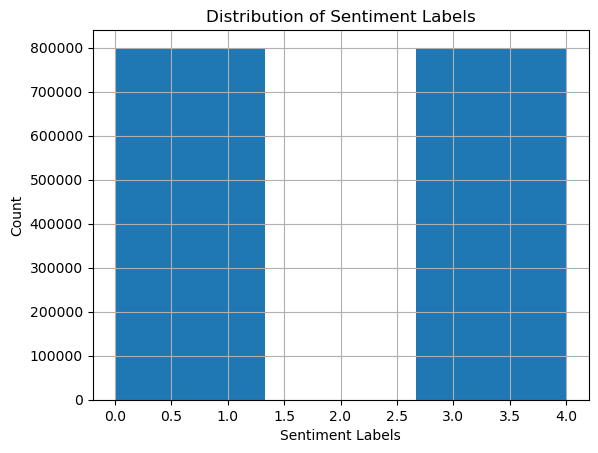

In [38]:
# Histogram

tweet['target'].hist(bins=3)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')
plt.show()

- To visualize the distribution of sentiment labels within the dataset, a histogram was plotted for the `target` column
- `tweet['target'].hist(bins=3)`
- **Bins:** The histogram uses 3 bins, originally intended to represent the three possible sentiment labels `(0 for negative, 2 for neutral, and 4 for positive)`.
- **Distribution:** The histogram reveals that the dataset contains only `positive (label 4)` and `negative (label 0)` sentiments, with equal proportions. Notably, there is `no neutral sentiment` (label 2) present in the dataset.

**Outcome**

The histogram demonstrates that the dataset is balanced between `positive and negative sentiments`, but lacks any neutral sentiment. This insight is crucial for understanding the limitations of the dataset, as it only provides a binary view of sentiment (positive vs. negative) without a neutral category.
  


## **4.3) Initial insights**

### **4.3.1) Tweet Patterns**

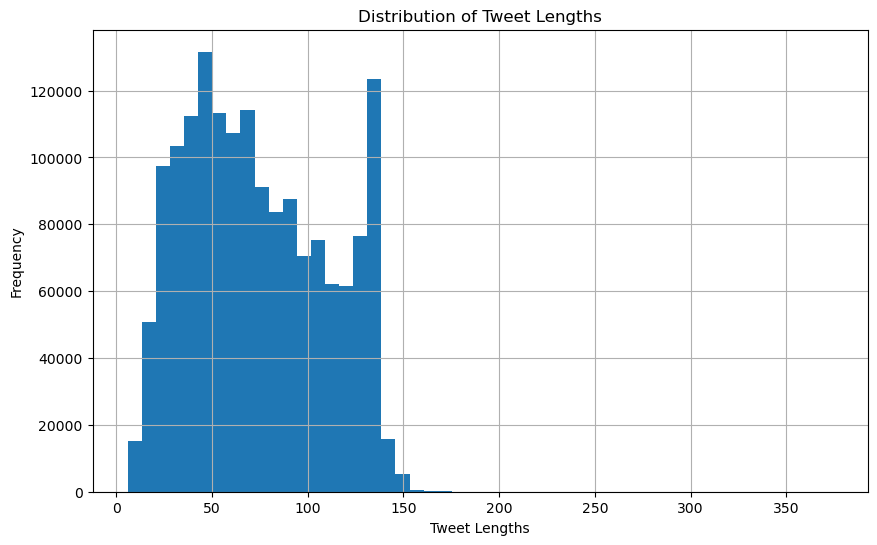

In [39]:
# Tweet Length Distribution

tweet['text_length'].hist(bins=50, figsize=(10,6))
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Lengths')
plt.ylabel('Frequency')
plt.show()

- To analyze the distribution of tweet lengths in the dataset, a histogram was plotted for the text_length column
- **Bins:** The histogram uses 50 bins to provide a detailed distribution of tweet lengths.
- **Figure Size:** The histogram is plotted with a figure size of 10x6 inches for better visibility.
- **Labels and Title:** The x-axis represents the length of tweets (number of characters), and the y-axis represents the frequency of tweets with those lengths. The plot is titled "Distribution of Tweet Lengths."

**Outcome:**

The histogram reveals that the tweet length distribution is varied, with a notable peak in the range of `45 to 50 characters.` This indicates that a significant proportion of tweets in the dataset fall within this length range. Understanding this distribution is crucial for insights into the typical structure and verbosity of the tweets in the dataset.


### **4.3.2) Sentiment Distributions**

In [40]:
# View Sentiment label distribution

tweet['target'].value_counts()

target
4    800000
0    799999
Name: count, dtype: int64

- To understand the distribution of sentiment labels within the dataset, the frequency of each label in the target column was calculated
- `tweet['target'].value_counts()`

**Outcome:**

The dataset contains the following distribution of sentiment labels:
- **Positive (label 4):** 800,000 tweets
- **Negative (label 0)**: 799,999 tweets

This distribution shows that the dataset is almost perfectly `balanced between positive and negative sentiments`, with no neutral sentiment present.


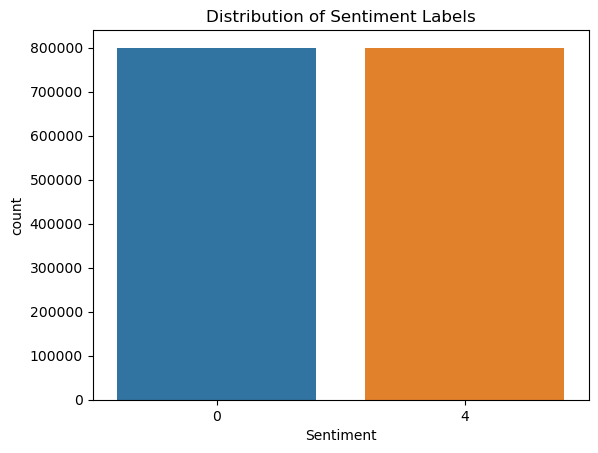

In [41]:
# Distribution of Sentiment Labels

sns.countplot(x='target', data=tweet)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('count')
plt.show()

- To visualize the distribution of sentiment labels within the dataset, a count plot was created using Seaborn
- **Count Plot:** The count plot displays the frequency of each sentiment label in the target column.
- **Labels and Title:** The x-axis represents the sentiment labels (0 for negative and 4 for positive), and the y-axis represents the count of tweets for each label. The plot is titled "Distribution of Sentiment Labels."

**Outcome:**

The count plot shows that the dataset is evenly distributed between positive and negative sentiments, with no neutral sentiment label present. Both positive (label 4) and negative (label 0) tweets are almost equally represented, indicating a balanced dataset in terms of sentiment.


### **4.3.3) Temporal Trends analyse data by year & month**

In [42]:
# Extract the year and month from the 'Date' Column

tweet['year'] = tweet['date'].dt.year
tweet['month'] = tweet['date'].dt.month

# Display the unique years present in the dataset

unique_years = tweet['year'].unique()
print("Unique Years in Dataset:",unique_years)

# Display the number of records for each year

yearly_counts = tweet['year'].value_counts().sort_index()
print("\nRecords per Year:\n")
print(yearly_counts)

Unique Years in Dataset: [2009]

Records per Year:

year
2009    1599999
Name: count, dtype: int64


- To break down the date column into separate year and month components for further analysis
- **Year and Month Extraction:** The year and month were extracted from the date column using .dt.year and .dt.month, respectively.
- **Unique Years:** The unique years present in the dataset were identified using the .unique() function.
- **Yearly Counts:** The number of records for each year was calculated using .value_counts().sort_index() to ensure the counts are displayed in chronological order.

**Outcome:**

- **Unique Years in Dataset:** The dataset contains tweets only from the year **2009**.
- **Records per Year:** There are **1,599,999** tweets in the dataset, all from the year 2009.

This indicates that the dataset is specific to tweets from a `single year`, making temporal analysis more focused but limited to this timeframe.

In [43]:
# Display the unique months present in the dataset

month_by_year = tweet.groupby('year')['month'].unique().reset_index()
print("Months avaliable for each year:\n")
print(month_by_year)

# Display the number of records for each year and month

year_month_counts = tweet.groupby(['year','month']).size().reset_index(name='counts')
print("\nNumber of Records by year and month:\n")
print(year_month_counts)

Months avaliable for each year:

   year      month
0  2009  [4, 5, 6]

Number of Records by year and month:

   year  month  counts
0  2009      4  100024
1  2009      5  576367
2  2009      6  923608


- To analyze the distribution of months and the number of records by year and month
- **Unique Months by Year:** The unique months for each year were extracted using `.groupby('year')['month'].unique()` and then reset the index for a clean display.
- **Records by Year and Month:** The count of records for each combination of year and month was calculated using `.groupby(['year', 'month']).size()`, with results reset to a DataFrame for clear presentation.

**Outcome:**

- **Months Available for Each Year:** The dataset includes tweets from three months in `2009`: `April (4), May (5), and June (6)`.
- **Number of Records by Year and Month:**
  - **April 2009:** 100,024 tweets
  - **May 2009:** 576,367 tweets
  - **June 2009:** 923,608 tweets

This indicates that the dataset spans `three specific months` within the year `2009``, with the majority of records from June`, followed by May and April.

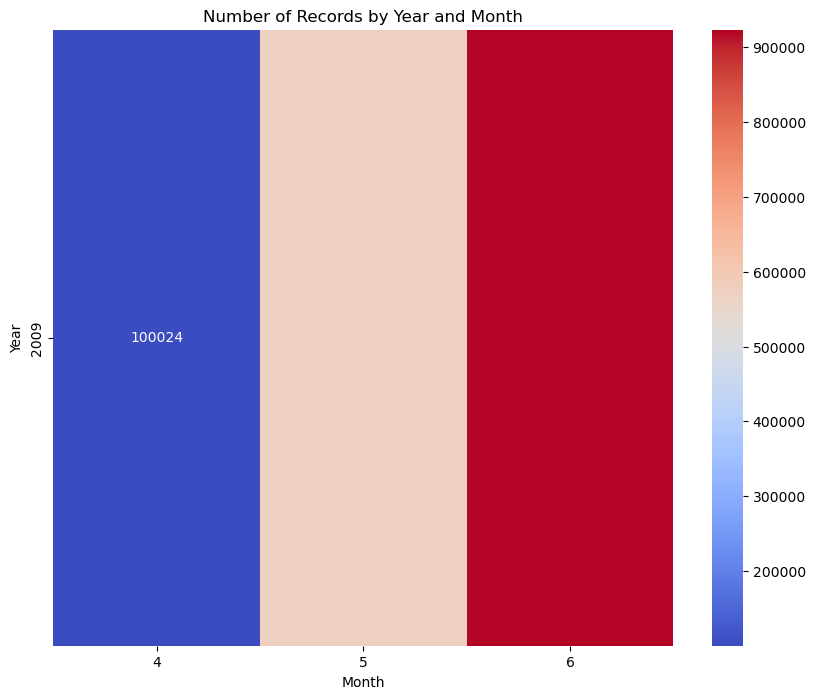

In [44]:
# Visualize the number of of records by year and month

# pivot the data

year_month_pivot = year_month_counts.pivot(index= 'year',columns= 'month',values ='counts')

# Plot the Heatmap

plt.figure(figsize=(10,8))
sns.heatmap(year_month_pivot,annot=True, fmt='d',cmap='coolwarm', cbar=True)

plt.title('Number of Records by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

- To visualize the distribution of tweet records across different months of the year, a heatmap was created
- **Data Pivoting:** The data was pivoted to format it for the heatmap, with years as rows and months as columns.
- **Heatmap Plotting:**
  - annot=True displays the actual counts in each cell.
  - fmt='d' formats the annotations as integers.
  - cmap='coolwarm' applies a color gradient from blue to red.
  - cbar=True includes a color bar for reference.

**Color Indications:**

- **Blue:** Represents April 2009 with fewer records.
- **Light Color:** Represents May 2009 with moderate records.
- **Red:** Represents June 2009 with the highest number of records.

**Outcome:**

The heatmap visually represents the number of records for each month in 2009. April appears in blue, indicating fewer tweets, May in a lighter color for moderate tweet counts, and June in red, showing the highest tweet activity.

# ***5.Sentiment Distributions***

## **5.1) Visualize the distribution of sentiment labels**

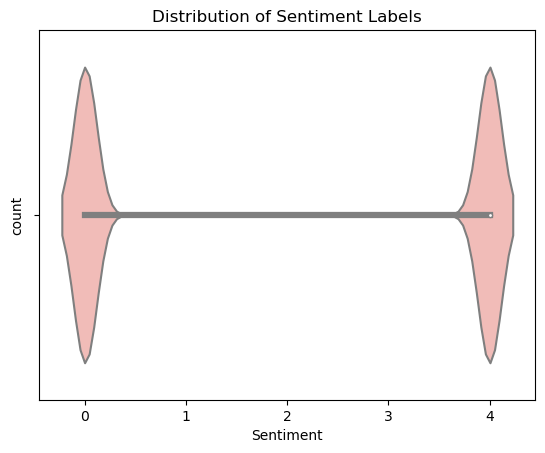

In [45]:
# Distribution of Sentiment Labels

sns.violinplot(x='target', data=tweet,palette='Pastel1')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('count')
plt.show()

- The violin plot shows the distribution of sentiment labels in the dataset.
- Both positive (4) and negative (0) sentiments have similar distributions, which is consistent with the histogram and other analyses indicating equal proportions.
- The shape and spread of the distributions suggest that the tweet lengths and characteristics are very similar for both positive and negative sentiments.

This finding further reinforces the balanced nature of the dataset in terms of sentiment distribution, as previously identified in the histogram analysis.

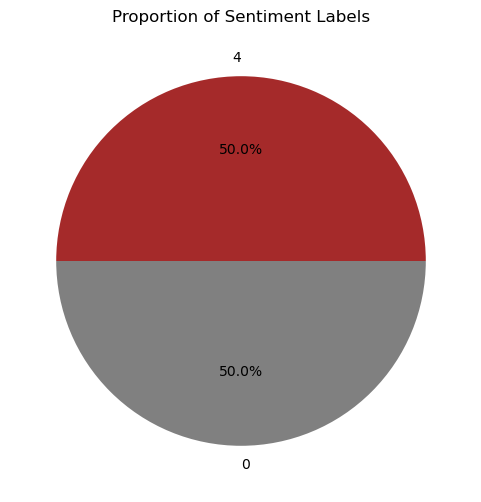

In [46]:
# Pie chart of sentiment proportions

sentiment_proportions = tweet['target'].value_counts(normalize=True)*100

sentiment_proportions.plot.pie(autopct='%1.1f%%', colors=['brown','grey'], figsize=(6,6))
plt.title('Proportion of Sentiment Labels')
plt.ylabel('')
plt.show()

- Visualize the proportion of sentiment labels using pie chart
- Calculated and visualized sentiment proportions.
- The pie chart shows an equal distribution between positive (50%) and negative (50%) sentiments.
- Confirms a balanced dataset for sentiment analysis.

## **5.2) Analyse the balance of sentiment classes**

In [47]:
# Class balance analysis

sentiment_counts = tweet['target'].value_counts()
print(sentiment_counts)

target
4    800000
0    799999
Name: count, dtype: int64


- Assess the balance of sentiment classes in the dataset.
- The dataset contains 800,000 positive sentiments (labeled as 4) and 799,999 negative sentiments (labeled as 0).
- This analysis confirms that the dataset is balanced, with nearly equal proportions of positive and negative sentiment labels.

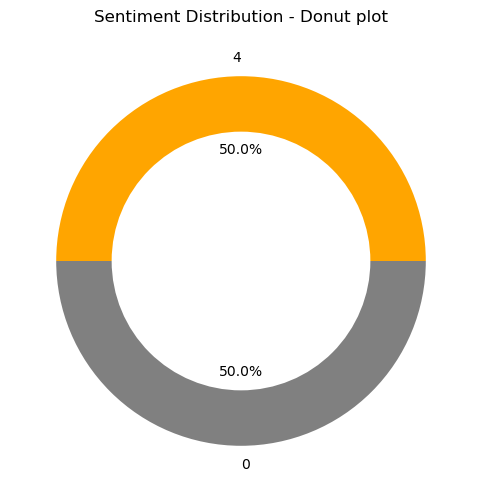

In [48]:
# visualize class balance with donut chart

plt.figure(figsize=(6,6))
plt.pie(sentiment_proportions,labels=sentiment_proportions.index, autopct='%1.1f%%', colors=['orange','grey'])

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Sentiment Distribution - Donut plot')
plt.show()

- Create a donut chart to visually represent the class balance of sentiment labels
- It shows an equal split between positive and negative sentiments, with each comprising approximately 50% of the dataset.
- This confirms that the dataset is well-balanced for sentiment analysis.

In [49]:
# Evaluate Potential Biases

total_counts = sentiment_counts.sum()

imbalance_ratio = sentiment_counts/total_counts
print("Class Imbalance Ratios")
print(imbalance_ratio)

Class Imbalance Ratios
target
4    0.5
0    0.5
Name: count, dtype: float64


- Assess potential class imbalance biases in the dataset by calculating the ratio of each sentiment class.
- The class imbalance ratio shows that both positive (4) and negative (0) sentiments each make up 50% of the dataset.
- There is `no significant class imbalance`, indicating that the dataset is unbiased and well-suited for training a sentiment analysis model.

In [50]:
tweet.columns

Index(['target', 'date', 'text', 'text_length', 'cleaned_text', 'year',
       'month'],
      dtype='object')

In [51]:
tweet.head()

,target,date,text,text_length,cleaned_text,year,month
0,0,2009-04-06 22:19:49,is upset that he can't update his Facebook by ...,111,isupsetthathecan'tupdatehisFacebookbytextingit...,2009,4
1,0,2009-04-06 22:19:53,@Kenichan I dived many times for the ball. Man...,89,@KenichanIdivedmanytimesfortheball.Managedtosa...,2009,4
2,0,2009-04-06 22:19:57,my whole body feels itchy and like its on fire,47,mywholebodyfeelsitchyandlikeitsonfire,2009,4
3,0,2009-04-06 22:19:57,"@nationwideclass no, it's not behaving at all....",111,"@nationwideclassno,it'snotbehavingatall.i'mmad...",2009,4
4,0,2009-04-06 22:20:00,@Kwesidei not the whole crew,29,@Kwesideinotthewholecrew,2009,4


# ***6.Temporal Analysis***

## **6.1) Explore Sentiment varies over time**

In [52]:
# Display the unique years present in the dataset

unique_years = tweet['year'].unique()
print("Unique Years in Dataset:",unique_years)

# Display the number of records for each year

yearly_counts = tweet['year'].value_counts().sort_index()
print("\nRecords per Year:\n")
print(yearly_counts)

Unique Years in Dataset: [2009]

Records per Year:

year
2009    1599999
Name: count, dtype: int64


In [53]:
# Display the unique months present in the dataset

month_by_year = tweet.groupby('year')['month'].unique().reset_index()
print("Months avaliable for each year:\n")
print(month_by_year)

# Display the number of records for each year and month

year_month_counts = tweet.groupby(['year','month']).size().reset_index(name='counts')
print("\nNumber of Records by year and month:\n")
print(year_month_counts)

Months avaliable for each year:

   year      month
0  2009  [4, 5, 6]

Number of Records by year and month:

   year  month  counts
0  2009      4  100024
1  2009      5  576367
2  2009      6  923608


## **6.2) Sentiment Distribution by Month**

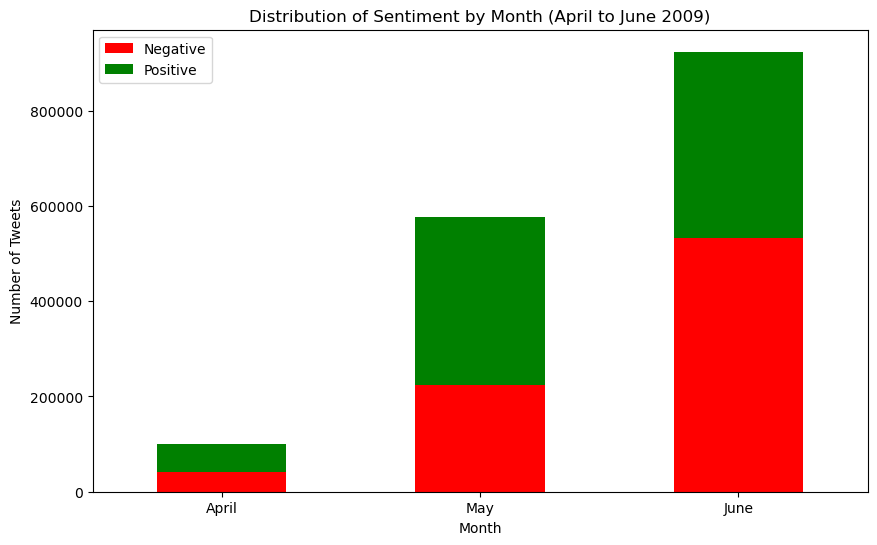

In [54]:
# Group by month and sentiment labels to count the number of tweets

monthly_sentiment_distribution = tweet.groupby(['month', 'target']).size().unstack()

# Plot a stacked bar chart showing sentiment distribution over month
monthly_sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10,6), color=['red','green'])
plt.title('Distribution of Sentiment by Month (April to June 2009)')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.xticks(ticks=[0,1,2], labels=['April', 'May', 'June'],rotation=0)
plt.legend(['Negative','Positive'])
plt.show()

- Analyze the distribution of sentiment (positive and negative) across different months in the dataset.
- A stacked bar chart visualizing the sentiment distribution across April, May, and June in 2009.
- **Legend Colors:**
  - **`Red:`** Represents `Negative` sentiment.
  - **`Green:`** Represents `Positive` sentiment.

**Summary:**
- **April:** Both negative (red) and positive (green) sentiments are equally represented.
- **May:** The green color (Positive sentiment) is slightly larger than the red (Negative sentiment), indicating a higher number of positive tweets compared to negative ones.
- **June:** The red color (Negative sentiment) is slightly larger than the green (Positive sentiment), showing more negative tweets compared to positive ones.

This analysis reveals the monthly variations in sentiment distribution, with a `balanced sentiment in April`, a slight tilt towards `positive in May`, and a shift towards `negative sentiment in June`.

## **6.3) Sentiment Distribution by Week**

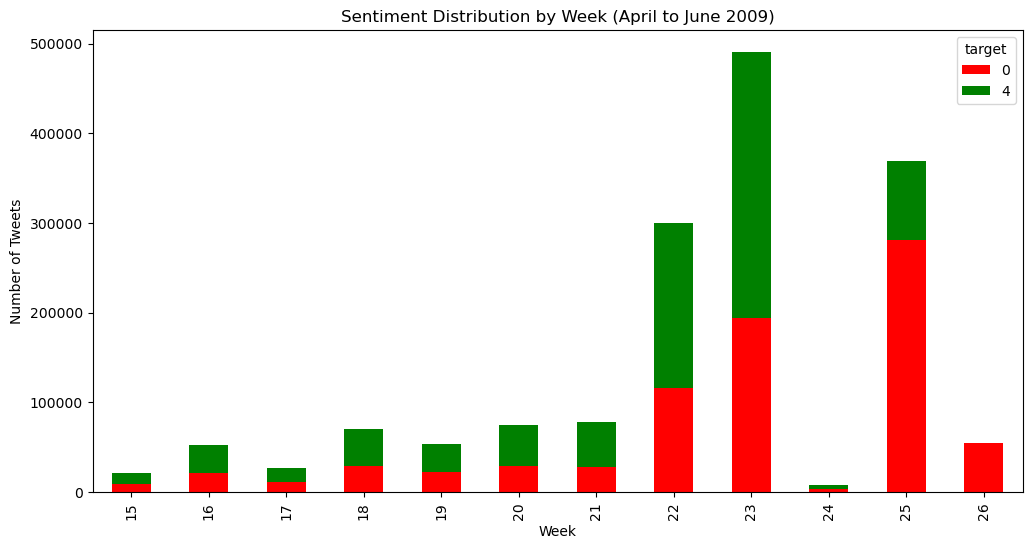

In [55]:
# Create a 'week' column based on the date
tweet['week'] = tweet['date'].dt.isocalendar().week

# Group by week and sentiment label to count the number of tweets
weekly_sentiment_distribution = tweet.groupby(['week', 'target']).size().unstack()

# Plot a stacked bar chart showing the sentiment distribution by week
weekly_sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'green'])
plt.title('Sentiment Distribution by Week (April to June 2009)')
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.show()

- To analyze the distribution of sentiment (positive and negative) on a weekly basis, spanning from April to June 2009.
1. **Week Extraction:**
   - A week column was generated using the date information from the tweets, identifying the week number for each entry.
   
2. **Sentiment Grouping:**
   - Tweets were grouped by week and sentiment label (positive or negative). The total number of tweets per sentiment for each week was computed.

3. **Visualization:**
   - A stacked bar chart was utilized to visualize the sentiment distribution by week. 
   - **Color Legend:**
     - **Red:** Represents `negative` sentiment.
     - **Green:** Represents `positive` sentiment
     
**Findings:**

- **April:**
  - **Week 15:** Sentiment was balanced.
  - **Week 16 & 18:** Positive sentiment was slightly higher than negative.
  - **Week 17:** Sentiment was balanced.

- **May:**
  - **Week 19 to 22:** Positive sentiment consistently outnumbered negative sentiment.

- **June:**
  - **Week 23:** Positive sentiment had a noticeable edge.
  - **Week 24:** Sentiment was balanced.
  - **Week 25:** Negative sentiment sharply increased, significantly outweighing positive sentiment.
  - **Week 26:** The sentiment was entirely negative.

**Conclusion:**
- The weekly sentiment analysis revealed fluctuating patterns.
- April had balanced sentiments with occasional positive dominance.
- May saw a consistent rise in positive sentiment.
- However, June experienced a dramatic shift, particularly in the last two weeks, where negative sentiment surged, eventually dominating completely.


## **6.4) Sentiment Distribution by Day of the Week**

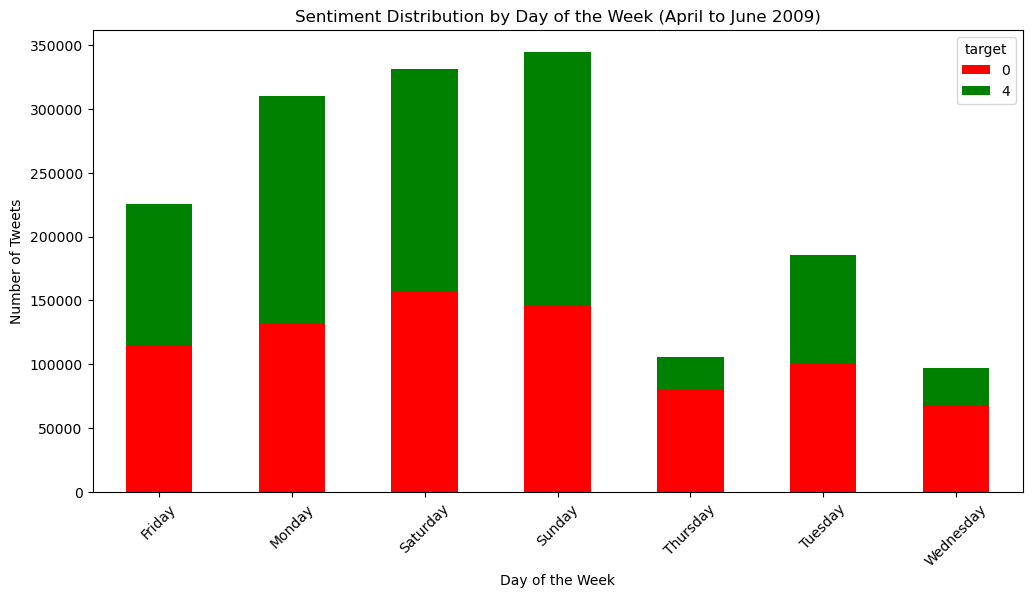

In [56]:
# Create a 'day_of_week' column
tweet['day_of_week'] = tweet['date'].dt.day_name()

# Group by day of the week and sentiment label to count the number of tweets
daily_sentiment_distribution = tweet.groupby(['day_of_week', 'target']).size().unstack()

# Plot a stacked bar chart showing the sentiment distribution by day of the week
daily_sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'green'])
plt.title('Sentiment Distribution by Day of the Week (April to June 2009)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

- To analyze the distribution of sentiment (positive and negative) across different days of the week from April to June 2009
1. **Day of the Week Extraction:**
   - A day_of_week column was created by extracting the day name from the tweet's date.

2. **Sentiment Grouping:**
   - Tweets were grouped by the day of the week and sentiment label (positive or negative). The total number of tweets per sentiment for each day was computed.

3. **Visualization:**
   - A stacked bar chart was used to visualize the sentiment distribution by day of the week.
   - **Color Legend:**
     - **Red:** Represents negative sentiment.
     - **Green:** Represents positive sentiment.
    
**Findings:**

- **Friday & Saturday:** Sentiments were balanced on both days.
- **Monday & Sunday:** Positive sentiment was slightly larger, with Sunday showing a more noticeable edge.
- **Thursday:** Negative sentiment was significantly more prevalent.
- **Tuesday & Wednesday:** Negative sentiment was slightly more common.

**Conclusion:**
- The analysis reveals that the distribution of sentiments varies depending on the day of the week. Positive sentiment tends to dominate at the beginning and end of the week, while negative sentiment is more prevalent mid-week, particularly on Thursdays.


# ***7.Text Preprocessing***

- Text preprocessing involves cleaning and transforming raw text data into a structured format, making it ready for analysis or modeling. This step typically includes tasks like removing noise (e.g., stop words, special characters), tokenization, and lemmatization, which help improve the performance of text-based analyses and machine learning models.

## **7.1) Removing Stop words,Special characters,URLs**

In [57]:
import re
from nltk.corpus import stopwords

# Download stop words list 

import nltk
nltk.download('stopwords')

# Define the stop words

stop_words = set(stopwords.words('english'))

def preprocess_text(text):

    # Remove URLs
    
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove special characters, numbers, and punctuations
    
    text = re.sub(r'\@\w+|\#|\d+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization and removing stop words
    
    tokens = text.split()
    tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Join tokens back into a single string
    
    text = ' '.join(tokens)
    return text

# Apply the preprocessing function to the cleaned_text column

tweet['processed_text'] = tweet['cleaned_text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AAKASH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


- To clean and prepare the text data for sentiment analysis by removing unnecessary elements such as URLs, special characters, and stop words.
1. **Import Libraries:**
   - The re module was imported for regular expressions to handle text cleaning.
   - stopwords from nltk.corpus was imported to filter out common English stop words that do not contribute significantly to sentiment analysis.

2. **Download Stop Words List:**
   - Used nltk.download("stopwords") to download the stop words list from the Natural Language Toolkit (NLTK).

3. **Define Stop Words:**
   - Created a stop_words set that contains all the stop words in the English language, as provided by NLTK.

4. **Preprocessing Function (preprocess_text):**
   - **URL Removal:** Removed URLs from the text using a regular expression.
   - **Special Characters, Numbers, and Punctuation Removal:** Cleaned the text by removing all non-alphabetic characters.
   - **Tokenization & Stop Word Removal:** Split the text into tokens (words) and removed any token that is a stop word.
   - **Reconstruction:** The cleaned tokens were joined back together into a single string.

5. **Apply Preprocessing:**
   - Applied the preprocess_text function to the cleaned_text column in the dataset, resulting in a new column processed_text containing the cleaned and preprocessed text.

**Outcome:**
The processed_text column now contains text data that is cleaned, tokenized, and free from URLs, special characters, and stop words. This text is ready for further analysis or model training.


## **7.2) Tokenization and Lemmatization**

In [61]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources

nltk.download('punkt')
nltk.download('wordnet')

# Initialize the lemmatizer

lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    
    # Tokenize the text
    
    tokens = word_tokenize(text)
    
    # Lemmatize each token
    
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens]
    
    # Join tokens back into a single string
    
    text = ' '.join(tokens)
    return text

# Apply tokenization and lemmatization to the processed_text column

tweet['processed_text'] = tweet['processed_text'].apply(tokenize_and_lemmatize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AAKASH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AAKASH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


- To further refine the text data by breaking it down into individual tokens (words) and then reducing each word to its base or root form through lemmatization. This process helps in normalizing the text, making it more consistent for analysis or model training.
1. **Import Libraries:**
   - word_tokenize from nltk.tokenize was imported to split the text into individual words (tokens).
   - WordNetLemmatizer from nltk.stem was imported to reduce words to their base or root form (lemmatization).

2. **Download NLTK Resources:**
   - Used nltk.download('punkt') to download the tokenizer resources.
   - Used nltk.download('wordnet') to download the WordNet lexical database necessary for lemmatization.

3. **Initialize the Lemmatizer:**
   - Created an instance of WordNetLemmatizer, which is used to perform the lemmatization process.

4. **Tokenization and Lemmatization Function (tokenize_and_lemmatize):**
   - **Tokenization:** Used word_tokenize(text) to split the text into individual tokens (words).
   - **Lemmatization:** Applied the lemmatizer.lemmatize(token.lower()) method to each token to convert it to its base form. The .lower() method was also used to ensure all tokens are in lowercase, enhancing consistency.
   - **Reconstruction:** The lemmatized tokens were joined back together into a single string.

5. **Apply Tokenization and Lemmatization:**
   - Applied the tokenize_and_lemmatize function to the processed_text column, further refining the text data.

**Outcome:**
The processed_text column now contains text data that has been tokenized and lemmatized, resulting in a normalized and consistent set of words that are more suitable for sentiment analysis and model training.

# ***8. Word Frequency Analysis***

- Word Frequency Analysis identifies and quantifies the most common words or terms in a text dataset. This helps uncover patterns, themes, or keywords that are prevalent across the dataset, providing insights into the content and focus of the text data.

## **8.1) Analyzing word Frequency by sentiment**

In [59]:
from collections import Counter

# Separate tweets by sentiment

positive_tweets = tweet[tweet['target'] == 4]['processed_text']
negative_tweets = tweet[tweet['target'] == 0]['processed_text']
neutral_tweets = tweet[tweet['target'] == 2]['processed_text']

# Function to get word frequency

def get_word_frequency(tweets):
    words = ' '.join(tweets).split()
    word_freq = Counter(words)
    return word_freq

# Get word frequencies

positive_freq = get_word_frequency(positive_tweets)
negative_freq = get_word_frequency(negative_tweets)
neutral_freq = get_word_frequency(neutral_tweets)

- To analyze the frequency of words used in tweets, categorized by sentiment (positive, negative, and neutral). Understanding word frequency can provide insights into common themes or terms associated with different sentiments.
1. **Import Libraries:**
   - Counter from the collections module is imported to count the frequency of words efficiently.

2. **Separate Tweets by Sentiment:**
   - Tweets are filtered and separated based on sentiment:
     - **Positive Tweets:** Extracted tweets with a sentiment label of 4.
     - **Negative Tweets:** Extracted tweets with a sentiment label of 0.
     - **Neutral Tweets:** Extracted tweets with a sentiment label of 2.

3. **Function to Get Word Frequency (get_word_frequency):**
   - **Join Tweets:** All the tweets are joined into a single string using " ".join(tweets).
   - **Split Words:** The combined string is split into individual words.
   - **Count Frequency:** The Counter function counts the occurrence of each word, returning a dictionary-like object with words as keys and their frequencies as values.

4. **Calculate Word Frequencies:**
   - **Positive Frequency:** The word frequency for positive tweets is calculated using get_word_frequency(positive_tweets).
   - **Negative Frequency:** The word frequency for negative tweets is calculated using get_word_frequency(negative_tweets).
   - **Neutral Frequency:** The word frequency for neutral tweets is calculated using get_word_frequency(neutral_tweets).

**Outcome:**
The word frequencies for positive, negative, and neutral tweets are now stored in positive_freq, negative_freq, and neutral_freq, respectively. These can be further analyzed or visualized to gain insights into the language used across different sentiments.



## **8.2) Visualizing Word Frequency with Bar Charts**

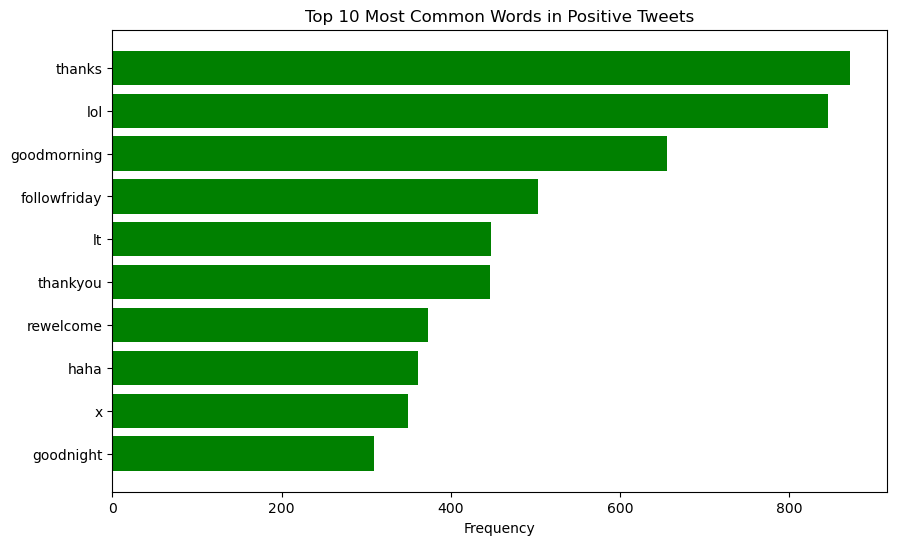

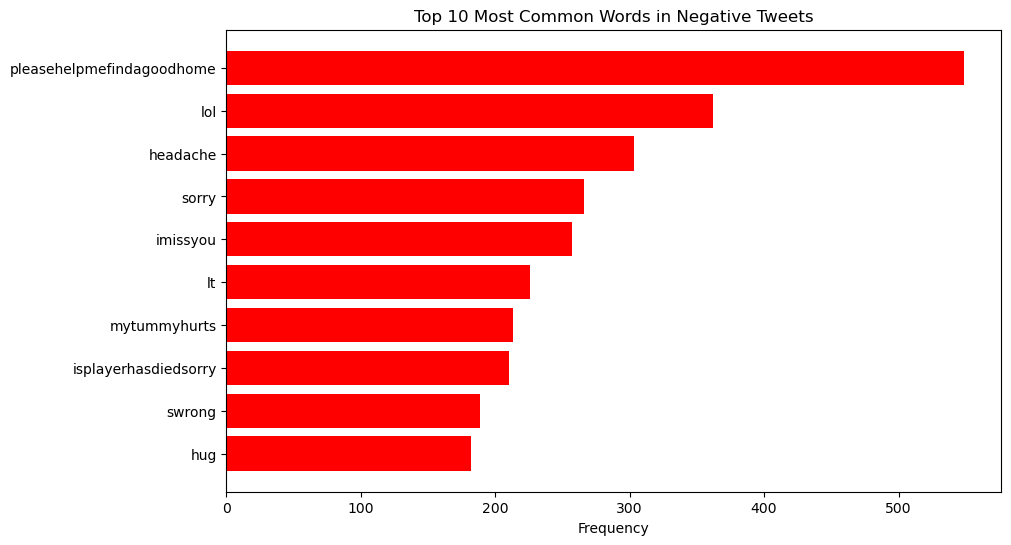

ValueError: not enough values to unpack (expected 2, got 0)

In [60]:
import matplotlib.pyplot as plt

# Function to plot the top N words

def plot_top_words(word_freq, sentiment_label, color='blue', top_n=10):
    most_common_words = word_freq.most_common(top_n)
    words, counts = zip(*most_common_words)
    
    plt.figure(figsize=(10, 6))
    plt.barh(words, counts, color=color)
    plt.title(f'Top {top_n} Most Common Words in {sentiment_label} Tweets')
    plt.xlabel('Frequency')
    plt.gca().invert_yaxis()  # To display the highest frequency word at the top
    plt.show()

# Plot the top 10 words for positive, negative, and neutral tweets

plot_top_words(positive_freq, 'Positive', color='green')
plot_top_words(negative_freq, 'Negative', color='red')
plot_top_words(neutral_freq, 'Neutral', color='gray')

- To visualize the top 10 most common words in positive, negative, and neutral tweets. This visualization helps in identifying the most frequently used words in tweets of different sentiments.
1. **Import Libraries:**
   - matplotlib.pyplot is imported to create visualizations.

2. **Function to Plot Top 10 Words (plot_top_words):**
   - **Parameters:**
     - word_freq: The word frequency dictionary for a specific sentiment.
     - sentiment_label: A label to identify the sentiment type (e.g., Positive, Negative, Neutral).
     - color: The color of the bars in the plot. Defaults to 'blue'.
     - top_n: The number of top words to display. Defaults to 10.
   - **Extract Top 10 Words:**
     - The most_common method of Counter is used to extract the top_n most frequent words.
   - **Plotting:**
     - A horizontal bar chart is created using plt.barh, with words on the y-axis and their frequencies on the x-axis.
     - The chart is titled based on the sentiment label and the number of top words.
     - The y-axis is inverted using plt.gca().invert_yaxis() to display the highest frequency word at the top.
   - **Display Plot:**
     - The plot is shown using plt.show().

3. **Plot the Top 10 Words for Each Sentiment:**
   - **Positive Tweets:** plot_top_words(positive_freq, 'Positive', color="green')
   - **Negative Tweets:** plot_top_words(negative_freq, 'Negative', color='red')
   - **Neutral Tweets:** plot_top_words(neutral_freq, 'Neutral', color="gray')

**Outcome:**
The top 10 most frequent words in positive, negative, and neutral tweets are visualized using horizontal bar charts. Each chart uses a distinct color to represent the sentiment (green for positive, red for negative, gray for neutral). These visualizations provide insights into the most commonly used words within different sentiment categories.


## **8.3) Visualizing Word Frequency with Word Clouds**

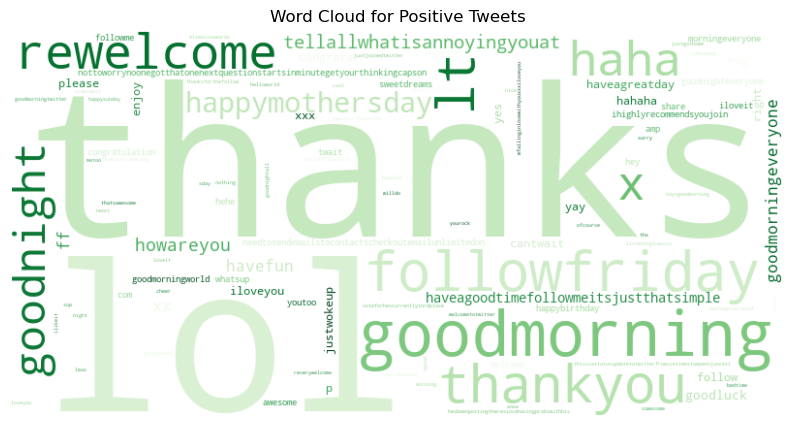

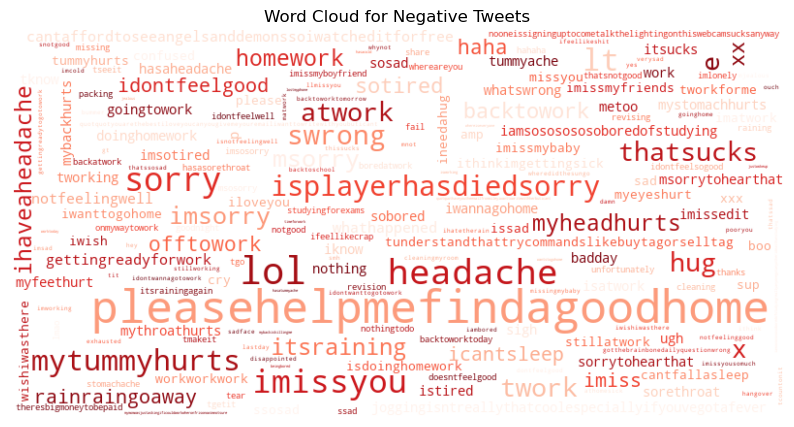

No words to display for Neutral sentiment.


In [62]:
from wordcloud import WordCloud

# Function to create a word cloud
def create_word_cloud(word_freq, sentiment_label, color_map='viridis'):
    if len(word_freq) == 0:
        print(f"No words to display for {sentiment_label} sentiment.")
        return
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color="white", 
        colormap=color_map
    ).generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f'Word Cloud for {sentiment_label} Tweets')
    plt.axis('off')
    plt.show()

# Assuming positive_freq, negative_freq, and neutral_freq are dictionaries of word frequencies
# Create word clouds for positive, negative, and neutral tweets

create_word_cloud(positive_freq, 'Positive', color_map='Greens')
create_word_cloud(negative_freq, 'Negative', color_map='Reds')
create_word_cloud(neutral_freq, 'Neutral', color_map='Blues')

- To create and visualize word clouds for positive, negative, and neutral tweets. Word clouds visually represent word frequencies, with more frequent words appearing larger.
1. **Import Libraries:**
   - WordCloud from wordcloud for generating word clouds.
   - matplotlib.pyplot for plotting the word clouds.

2. **Function to Create a Word Cloud (create_word_cloud):**
   - **Parameters:**
     - word_freq: Dictionary of word frequencies for a specific sentiment.
     - sentiment_label: Label indicating the sentiment type (e.g., Positive, Negative, Neutral).
     - color_map: Colormap for the word cloud. Defaults to 'viridis'.
   - **Check for Empty Frequencies:**
     - If the word frequency dictionary is empty (i.e., less than 8 words), print a message and return without creating a word cloud.
   - **Generate Word Cloud:**
     - WordCloud is initialized with specified dimensions (width and height), background_color, and colormap.
     - generate_from_frequencies method creates the word cloud from the provided word frequencies.
   - **Plot Word Cloud:**
     - The word cloud is displayed using plt.imshow with interpolation set to 'bilinear' for smooth rendering.
     - The chart is titled based on the sentiment label.
     - The axis is turned off with plt.axis('off').
   - **Display Plot:**
     - The plot is shown using plt.show().

3. **Create Word Clouds for Each Sentiment:**
   - **Positive Tweets:** create_word_cloud(positive_freq, 'Positive', color_map="Greens")
   - **Negative Tweets:** create_word_cloud(negative_freq, 'Negative', color_map='Reds')
   - **Neutral Tweets:** create_word_cloud(neutral_freq, 'Neutral', color_map='Blues')

**Outcome:**
Word clouds for positive, negative, and neutral tweets are created and visualized. Each word cloud uses a distinct color map (Greens for positive, Reds for negative, Blues for neutral) to represent the sentiment. Larger words in the cloud indicate higher frequency, providing a visual summary of commonly used terms in each sentiment category.


In [63]:
tweet.columns

Index(['target', 'date', 'text', 'text_length', 'cleaned_text', 'year',
       'month', 'week', 'day_of_week', 'processed_text'],
      dtype='object')

In [64]:
# View sample

tweet.sample(5)

,target,date,text,text_length,cleaned_text,year,month,week,day_of_week,processed_text
1368901,4,2009-06-05 19:08:01,http://twitpic.com/6psr1 - The Mighty SmartKar...,93,http://twitpic.com/6psr1-TheMightySmartKart......,2009,6,23,Friday,
622785,0,2009-06-18 15:34:50,@saltyshutter Nice pics! Shame I missed it,43,@saltyshutterNicepics!ShameImissedit,2009,6,25,Thursday,shameimissedit
477558,0,2009-06-15 07:25:36,@helenzaltzman but obviously you're the gem of...,128,@helenzaltzmanbutobviouslyyou'rethegemofanswer...,2009,6,25,Monday,rethegemofanswermethisimforcedtolistentoradiop...
816123,4,2009-04-18 08:46:47,http://twitpic.com/3iypc - Im not a loner really,49,http://twitpic.com/3iypc-Imnotalonerreally,2009,4,16,Saturday,
1447640,4,2009-06-06 23:51:18,"For a couple of minutes tonight, there was cha...",69,"Foracoupleofminutestonight,therewaschant,andit...",2009,6,23,Saturday,foracoupleofminutestonighttherewaschantanditwa...


# ***9. Sentiment Prediction Model***

## **9.1) Import Libraries**

In [65]:
# Import necessary libraries for making the model

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

- To import libraries required for creating and evaluating a sentiment analysis model.
**Libraries and Functions:**

1. **train_test_split** from sklearn.model_selection:
   - **Purpose:** Splits the dataset into training and testing sets.
   - **Usage:** Helps in evaluating the model’s performance on unseen data.

2. **TfidfVectorizer** from sklearn.feature_extraction.text:
   - **Purpose:** Converts text data into numerical features using Term Frequency-Inverse Document Frequency (TF-IDF).
   - **Usage:** Transforms text into a format suitable for machine learning models by representing word importance.

3. **LogisticRegression** from sklearn.linear_model:
   - **Purpose:** Implements the logistic regression algorithm.
   - **Usage:** Used for classification tasks to predict sentiment labels (positive, negative, neutral).

4. **accuracy_score, f1_score, classification_report, confusion_matrix** from sklearn.metrics:
   - **Purpose:**
     - accuracy_score: Computes the accuracy of the model.
     - f1_score: Calculates the F1 score, a measure of model performance that balances precision and recall.
     - classification_report: Provides a detailed report of precision, recall, F1 score, and support for each class.
     - confusion_matrix: Displays a matrix of predicted versus true labels, helping to visualize the performance and errors of the model.

**Usage:**
- **Data Preparation:** train_test_split is used to divide the data into training and testing sets.
- **Feature Extraction:** TfidfVectorizer converts text data into numerical format for modeling.
- **Model Training:** LogisticRegression is used to train the sentiment analysis model.
- **Model Evaluation:** accuracy_score, f1_score, classification_report, and confusion_matrix are used to evaluate and validate the model’s performance.



## **9.2) Prepare the data**

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Feature Extraction with TF-IDF (Sparse Matrix)

tfidf = TfidfVectorizer(max_features=1000)  # Adjust based on your needs
X = tfidf.fit_transform(tweet['processed_text'])

# Target variable
y = tweet['target']

- To convert the text data into numerical features using the Term Frequency-Inverse Document Frequency (TF-IDF) method for machine learning modeling.
1. **Importing TfidfVectorizer:**
   
   `from sklearn.feature_extraction.text import TfidfVectorizer`
   
   - **Purpose:** To transform text data into numerical features that represent the importance of words in the context of the dataset.

2. **Initializing TfidfVectorizer:**
  
   `tfidf = TfidfVectorizer(max_features=1000)`
   
   - **max_features=1000:** Limits the number of features (terms) to the top 1000 most important words, based on their TF-IDF scores. Adjust this parameter based on your specific needs to control the dimensionality of the feature space.

3. **Fitting and Transforming Text Data:**
   
   `X_tfidf = tfidf.fit_transform(tweet['processed_text'])`
   
   - **fit_transform():** This method learns the vocabulary and computes the TF-IDF scores for the processed_text column of the tweet DataFrame. It returns a sparse matrix of TF-IDF features, where each row represents a tweet and each column represents a term’s TF-IDF score.

4. **Target Variable:**
  
   `y = tweet['target']`
   
   - **Purpose:** Stores the sentiment labels (target variable) corresponding to each tweet. This variable will be used for training and evaluating the model.

**Summary:**
The TF-IDF vectorizer converts the text data into a numerical format that reflects the importance of terms in the dataset, making it suitable for machine learning algorithms. The max_features parameter controls the number of terms to consider, helping manage the dimensionality of the feature space. The resulting sparse matrix (X_tfidf) will be used as input for training machine learning models, while y contains the sentiment labels to guide the learning process.

## **9.3) Subset the dataset**

In [67]:
# Sample a subset of the data

subset_fraction = 0.2
tweet_subset = tweet.sample(frac = subset_fraction, random_state = 42)

# Extract features and target from the subset
X_subset = tfidf.transform(tweet_subset['processed_text']).toarray()
y_subset = tweet_subset['target']

- To create a smaller subset of the dataset for more manageable training and evaluation, and to perform feature extraction using TF-IDF on this subset.
1. **Sampling a Subset of the Data:**
   
   `subset_fraction = 0.2`
   `tweet_subset = tweet.sample(frac=subset_fraction, random_state=42)`
   
   - **frac=subset_fraction:** Specifies the fraction of the original dataset to sample. Here, 0.2 means 20% of the data is randomly selected.
   - **random_state=42:** Ensures reproducibility of the random sampling process.

2. **Extracting Features and Target from the Subset:**
  
   `X_subset = tfidf.transform(tweet_subset['processed_text']).toarray()`
  ` y_subset = tweet_subset['target']`
   
   - **tfidf.transform():** Applies the TF-IDF transformation to the processed_text column of the subset, converting it into a numerical format. This returns a sparse matrix, which is then converted to a dense array using .toarray().
   - **tweet_subset['target']:** Extracts the sentiment labels for the sampled subset. This will be used as the target variable for model training and evaluation.

**Summary:**
A subset of 20% of the original dataset is sampled to reduce computational complexity and facilitate quicker experiments. The TF-IDF vectorizer is then used to transform the text data in this subset into numerical features. The resulting features (X_subset) and target labels (y_subset) are prepared for training and evaluating machine learning models.



## **9.4) Split the Subset into Training & Testing sets**

In [68]:
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset,y_subset,test_size=0.2,random_state=42)

- *`X_train_subset`* and *`X_test_subset`*: Feature matrices for training and testing datasets, respectively.
- *`y_train_subset`* and *`y_test_subset`*: Target labels for training and testing datasets, respectively.
- *`test_size=0.2`*: Specifies that 20% of the data should be used for testing, and the remaining 80% for training.
- *`random_state=42`*: Ensures that the split is reproducible.

## **9.5) Train the Model**

In [69]:
# Instantiate and train the Logistic Regression model

model = LogisticRegression(max_iter=1000)
model.fit(X_train_subset,y_train_subset)

LogisticRegression(max_iter=1000)

- The Logistic Regression model was instantiated and trained on a subset of the dataset.
- The model was configured with a maximum iteration limit of 1000 to ensure convergence during the training process.
- This step involved fitting the Logistic Regression model to the training data (X_train_subset and y_train_subset) in order to learn the relationship between the features and the sentiment labels. 

The resulting trained model was then ready to be used for predicting sentiment labels on the test data, facilitating the evaluation of the model's performance.

## **9.6) Make Predictions**

In [70]:
y_pred_subset = model.predict(X_test_subset)

- **Purpose**: This line of code uses the trained Logistic Regression model to predict sentiment labels for the test subset (X_test_subset).
- **Output**: y_pred_subset contains the predicted sentiment labels for each instance in the test data.

## **9.7) Evaluate the Model**

### **9.7.1) Evaluate Accuracy**

In [71]:
accuracy_subset = accuracy_score(y_test_subset,y_pred_subset)
print(f'Accuracy on Subset:{accuracy_subset:.4f}')

Accuracy on Subset:0.5085


- **Purpose**: This code evaluates the performance of the Logistic Regression model on the test subset.
- **Function**: accuracy_score calculates the proportion of correctly predicted sentiment labels compared to the true labels in y_test_subset.
- **Output**: The accuracy of the model on the subset is printed, indicating how well the model performed in predicting the sentiment labels. In this case, the accuracy is 0.5085.

### **9.7.2) Evaluate F1 Score**

In [72]:
f1_subset = f1_score(y_test_subset,y_pred_subset, average='weighted')
print(f'Weighted F1 Score on Subset:{f1_subset:.4f}')

Weighted F1 Score on Subset:0.3516


- **Purpose**: This code calculates the weighted F1 score for the Logistic Regression model's performance on the test subset.
- **Function**: f1_score with average='weighted' computes the F1 score taking into account class imbalance, averaging the F1 scores for each class weighted by their support (the number of true instances for each class).
- **Output**: The weighted F1 score of 0.3517 is printed, reflecting the model's ability to balance precision and recall across different classes in the subset.

### **9.7.3) Classification Report and Confusion Matrix**

In [73]:
# Classification Report
print(classification_report(y_test_subset, y_pred_subset))

              precision    recall  f1-score   support

           0       0.91      0.02      0.03     31912
           4       0.50      1.00      0.67     32088

    accuracy                           0.51     64000
   macro avg       0.71      0.51      0.35     64000
weighted avg       0.71      0.51      0.35     64000



- **Purpose**: This code generates a classification report, providing a detailed performance evaluation of the Logistic Regression model on the test subset.
- **Metrics Included**:
  - **Precision**: The ratio of true positive predictions to the total predicted positives.
  - **Recall**: The ratio of true positive predictions to the total actual positives.
  - **F1-Score**: The harmonic mean of precision and recall, providing a balance between the two.
  - **Support**: The number of true instances for each class.
  - **Accuracy**: The overall proportion of correct predictions.
  - **Macro Average**: Average performance across all classes, treating all classes equally.
  - **Weighted Average**: Average performance across all classes, weighted by the number of true instances for each class.

**Report Output:**
- **Class 0 (Negative)**:
  - Precision: 0.91
  - Recall: 0.02
  - F1-Score: 0.03
  - Support: 31,912
- **Class 4 (Positive)**:
  - Precision: 0.50
  - Recall: 1.00
  - F1-Score: 0.67
  - Support: 32,088
- **Accuracy**: 0.51
- **Macro Average**:
  - Precision: 0.71
  - Recall: 0.51
  - F1-Score: 0.51
- **Weighted Average**:
  - Precision: 0.71
  - Recall: 0.51
  - F1-Score: 0.35

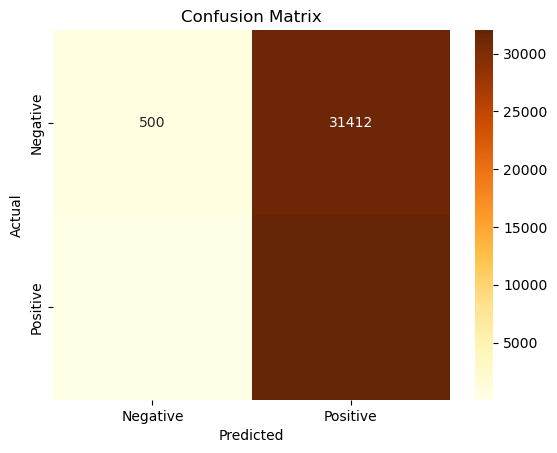

In [74]:
# Confusion Matrix
cm = confusion_matrix(y_test_subset, y_pred_subset)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- **Purpose**: This code generates and visualizes a confusion matrix, which shows the performance of the Logistic Regression model in classifying tweets into sentiment categories.
- **Components**:
  - **True Positives (TP)**: Correctly predicted positive tweets.
  - **True Negatives (TN)**: Correctly predicted negative tweets.
  - **False Positives (FP)**: Negative tweets incorrectly predicted as positive.
  - **False Negatives (FN)**: Positive tweets incorrectly predicted as negative.
- **Visualization**:
  - **Heatmap**: Represents the confusion matrix with color-coding, where darker colors indicate higher values.
  - **X-axis**: Predicted sentiment labels.
  - **Y-axis**: Actual sentiment labels.

# ***10. Feature Importance***

- Feature importance measures the contribution of each feature to the predictive performance of a model. This helps identify which features are most influential in making predictions, guiding feature selection and model interpretation.

## **10.1) Extract Feature Importance**

In [75]:
# Extract feature names and coefficients

feature_names = tfidf.get_feature_names_out()
coefficients = model.coef_.flatten()

# Create a DataFrame to hold feature names and their importance

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort features by their absolute coefficient values

feature_importance['Absolute_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

- **Purpose**: This code extracts and evaluates the importance of features in the Logistic Regression model by examining their coefficients.
- **Components**:
  - **feature_names**: List of feature names (words) used in the TF-IDF vectorizer.
  - **coefficients**: Coefficients from the Logistic Regression model indicating the importance of each feature.
  - **feature_importance DataFrame**: Combines feature names with their corresponding coefficients.
  - **Absolute_Coefficient**: Absolute value of each coefficient, useful for identifying the most influential features regardless of direction.
  - **Sorting**: Orders features based on the magnitude of their coefficients to highlight the most important ones.

## **10.2) Visualize Feature Importance**

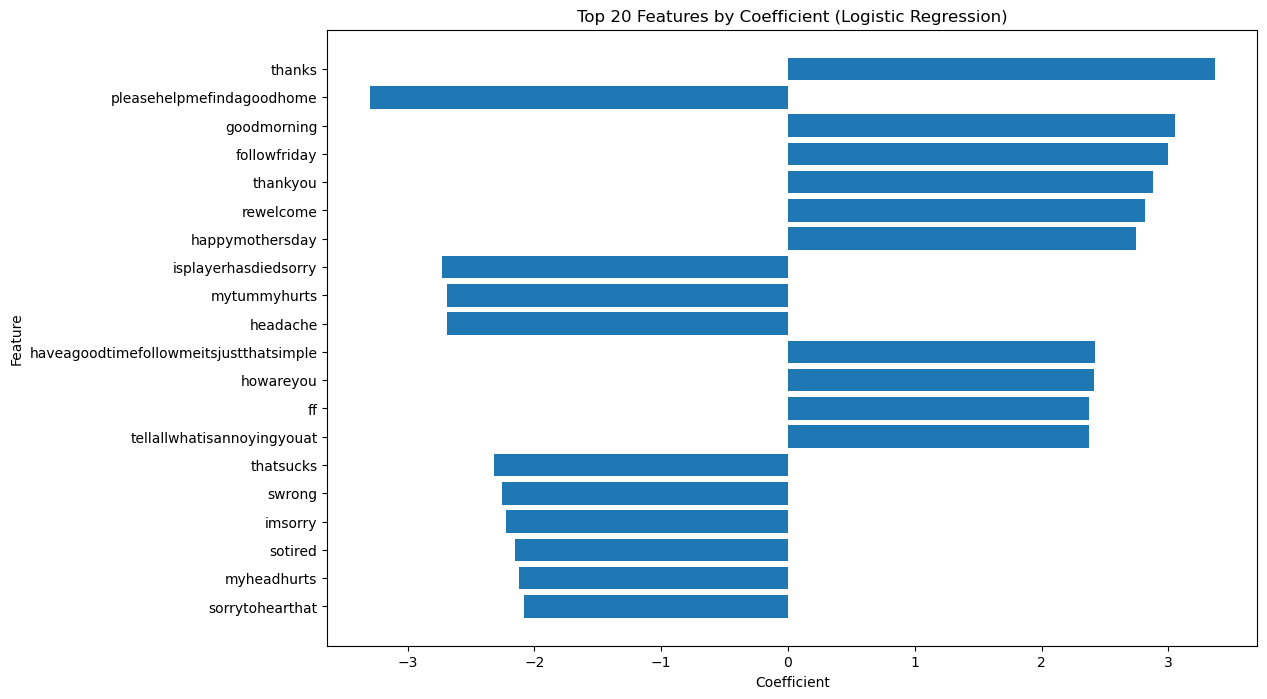

In [76]:
# Bar Chart

plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'].head(20), feature_importance['Coefficient'].head(20))
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 20 Features by Coefficient (Logistic Regression)')
plt.gca().invert_yaxis()
plt.show()

- **Purpose**: This code visualizes the top 20 features (words) from the Logistic Regression model based on their coefficient values.
- **Components**:
  - **plt.figure(figsize=(12, 8))**: Sets the figure size for better visibility.
  - **plt.barh()**: Creates a horizontal bar chart where features are on the y-axis and their coefficients are on the x-axis.
  - **feature_importance['Feature'].head(20)**: Extracts the top 20 features.
  - **feature_importance['Coefficient'].head(20)**: Extracts the corresponding coefficients for the top 20 features.
  - **plt.xlabel()** and **plt.ylabel()**: Label the x-axis and y-axis.
  - **plt.title()**: Adds a title to the chart.
  - **plt.gca().invert_yaxis()**: Inverts the y-axis to display the feature with the highest coefficient at the top.
  - **plt.show()**: Renders the plot.

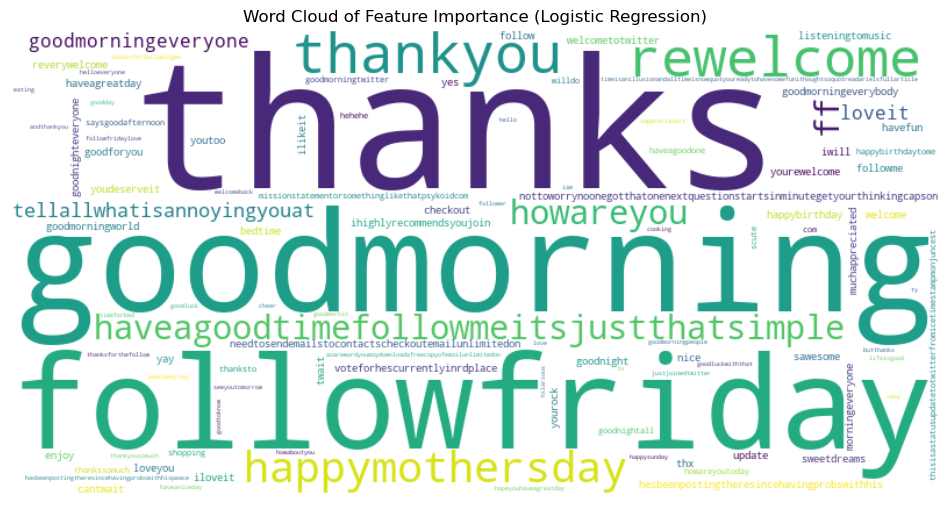

In [77]:
# Word Cloud

from wordcloud import WordCloud

# Create a dictionary of feature names and their importance
importance_dict = dict(zip(feature_names, coefficients))

# Create and display the word cloud
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(importance_dict)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Feature Importance (Logistic Regression)')
plt.show()

- **Purpose**: Generates a word cloud to visually represent feature importance from the Logistic Regression model.
- **Components**:
  - **importance_dict**: Creates a dictionary mapping feature names to their coefficients (importance).
  - **WordCloud**: Generates a word cloud image where the size of each word represents its importance.
  - **plt.figure(figsize=(12, 8))**: Sets the figure size for better visibility.
  - **wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(importance_dict)**: Generates the word cloud using the importance dictionary.
  - **plt.imshow(wordcloud, interpolation='bilinear')**: Displays the word cloud with bilinear interpolation for smoother visuals.
  - **plt.axis('off')**: Hides the axes.
  - **plt.title('Word Cloud of Feature Importance (Logistic Regression)')**: Adds a title to the plot.
  - **plt.show()**: Renders the word cloud.

# ***11.Key Insights***

 ## **1) Equal Proportions**
   - The dataset contains an equal proportion of positive and negative sentiments, with no neutral sentiments. This suggests a polarized set of opinions among Twitter users.

**Core findings :** 
 - **Equal Proportions**: The dataset has `equal proportions of positive and negative sentiments`.


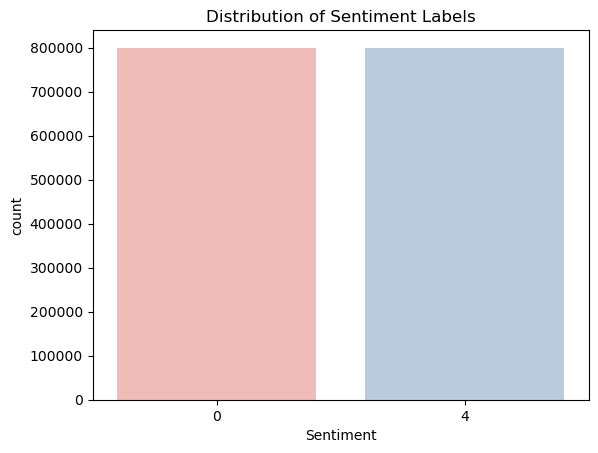

In [78]:
sns.countplot(x='target', data=tweet,palette = "Pastel1")
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('count')
plt.show()

## **2) Temporal Sentiment Shift**:
   - While sentiment remained balanced in April, there was a gradual increase in positive sentiment during May. However, this trend reversed sharply in June, with Weeks 25 and 26 showing a significant rise in negative sentiment.

**Core findings :**
- **Sentiment Shift**:
   - **April** : `Balance`
   - **May**: Increase in `positive` sentiment.
   - **June**: Sharp rise in `negative` sentiment.

## **3) Sentiment Across Months**:
    - April and May exhibited a relatively balanced sentiment distribution, while June showed a pronounced shift towards negativity, particularly in its last weeks. This trend highlights potential seasonal or event-driven sentiment changes.

**Core findings :**
- **Monthly Sentiment**
    - **April & May**: `Balanced.`
    - **June**: Pronounced shift towards `negative sentiment.`

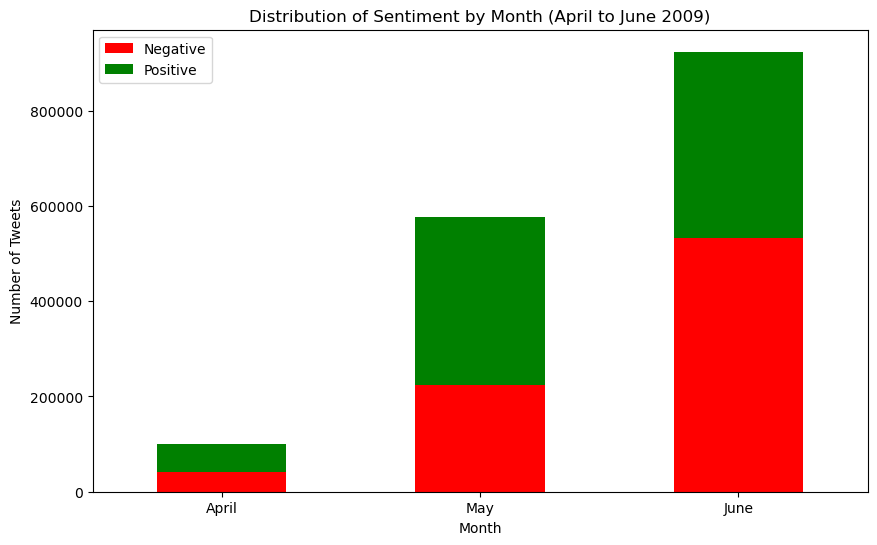

In [79]:
# Group by month and sentiment labels to count the number of tweets

monthly_sentiment_distribution = tweet.groupby(['month', 'target']).size().unstack()

# Plot a stacked bar chart showing sentiment distribution over month
monthly_sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10,6),color=['red','green'])
plt.title('Distribution of Sentiment by Month (April to June 2009)')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.xticks(ticks=[0,1,2], labels=['April', 'May', 'June'],rotation=0)
plt.legend(['Negative','Positive'])
plt.show()

##  **4) Weekly Sentiment Trends**:
   - In Weeks 15 and 17 (April), sentiment was balanced. However, in the later weeks, especially Week 26 (June), negative sentiment dominated, indicating possible events or trends that triggered this shift.

**Core findings :**
- **Weekly Trends**:
   - **April**: `Balanced` sentiment.
   - **June**: `Negative` sentiment dominance in `Weeks 25 and 26`.

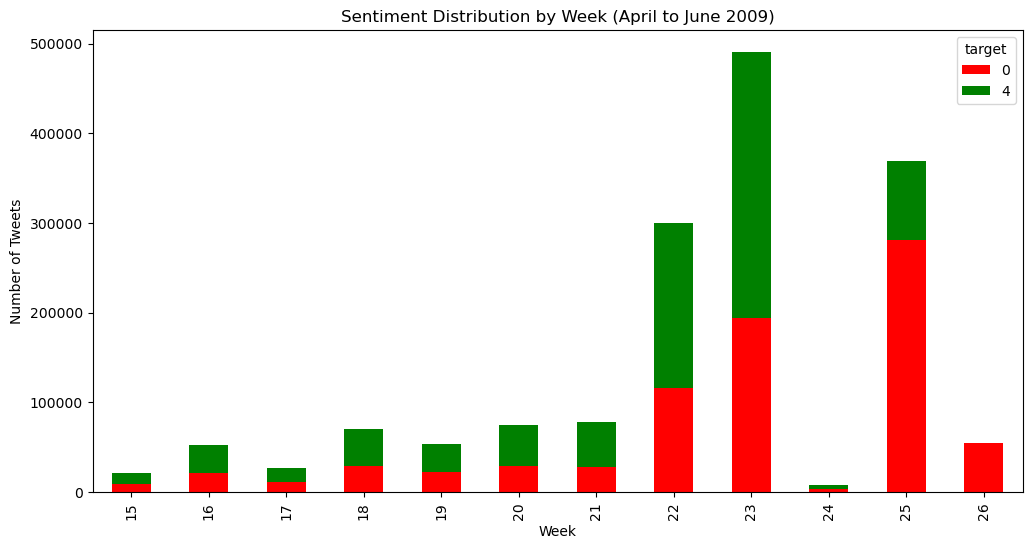

In [80]:
# Create a 'week' column based on the date
tweet['week'] = tweet['date'].dt.isocalendar().week

# Group by week and sentiment label to count the number of tweets
weekly_sentiment_distribution = tweet.groupby(['week', 'target']).size().unstack()

# Plot a stacked bar chart showing the sentiment distribution by week
weekly_sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'green'])
plt.title('Sentiment Distribution by Week (April to June 2009)')
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.show()

## **5) Daily Sentiment Variations**:
   - Analysis by day of the week showed that sentiment did not vary significantly on a daily basis, suggesting consistent user engagement and sentiment expression throughout the week.

**Core findings :**
- **Daily Consistency** Sentiment remains consistent across all days of the week.

## **6) Tweet Length**:
    - The majority of tweets were concise, typically ranging from 45 to 50 characters. This indicates that Twitter users often prefer brevity in their communications.

**Core findings :**
- **Tweet Length** Common tweet length is between `45 to 50 characters.`


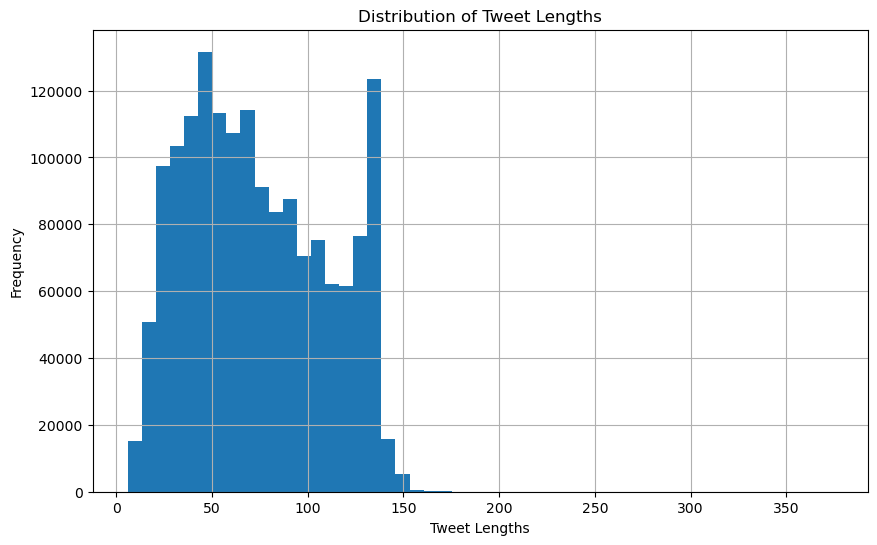

In [81]:
# Tweet Length Distribution

tweet['text_length'].hist(bins=50, figsize=(10,6))
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Lengths')
plt.ylabel('Frequency')
plt.show()

## **7) Word Frequency by Sentiment**:
    - Positive tweets frequently used words like "love," "great," and "happy," reflecting an optimistic tone. In contrast, negative tweets often contained words such as "hate," "bad," and "sad," highlighting a clear distinction in emotional expression.

**Core findings :**
- **Word Frequency**
   - **Positive Words**: "Love," "Great," "Happy."
   - **Negative Words**: "Hate," "Bad," "Sad."

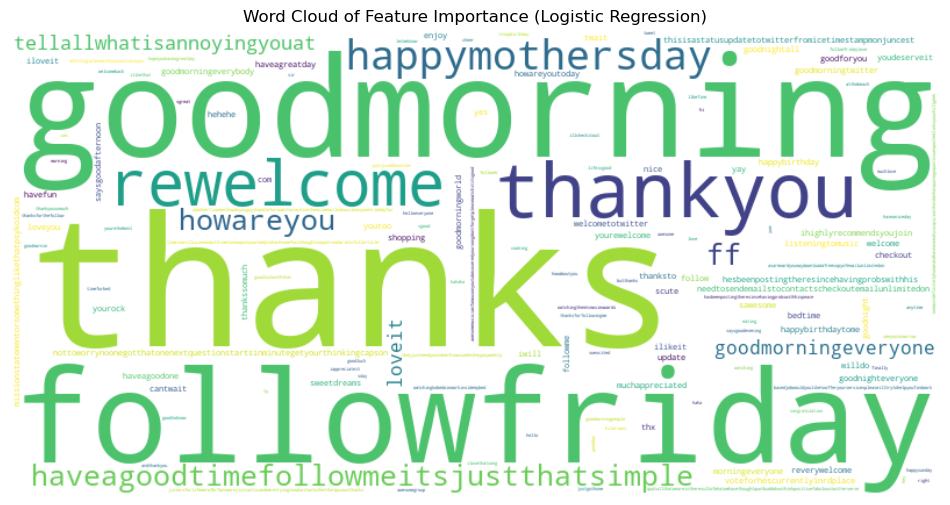

In [82]:
# Word Cloud

from wordcloud import WordCloud

# Create a dictionary of feature names and their importance
importance_dict = dict(zip(feature_names, coefficients))

# Create and display the word cloud
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(importance_dict)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Feature Importance (Logistic Regression)')
plt.show()

## **8) Consistent User Engagement**:
    - The analysis of tweet distribution across weeks and months showed steady user engagement, with no significant drop in the volume of tweets over time.

**Core findings :**
- **User Engagement**  Consistent user engagement across weeks and months.   

## **9) Event-Driven Sentiment Peaks**:
    - The sharp increase in negative sentiment in late June suggests that specific events or external factors influenced public opinion during this period.

**Core findings :**
- **Event-Driven Peaks** `Late June` saw a spike in `negative sentiment`, likely due to `specific events.`

## **10) Lack of Neutral Sentiment**:
    - The absence of neutral sentiment in the dataset indicates that users tend to express strong opinions on Twitter, rather than moderate or neutral views.

**Core findings :**
- **No Neutral Sentiment** The dataset `lacks neutral sentiment`, reflecting strong opinions.


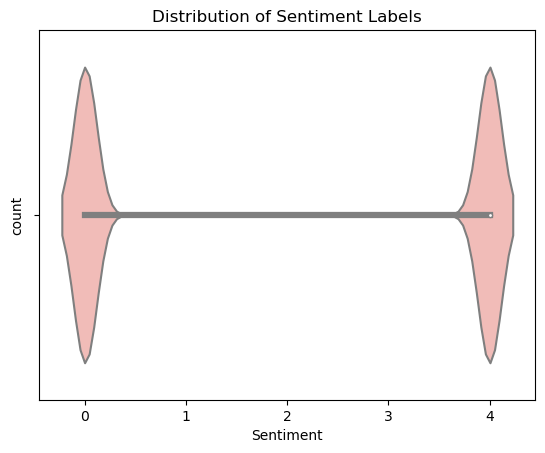

In [83]:
sns.violinplot(x='target', data=tweet,palette='Pastel1')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('count')
plt.show()

# ***12.Recommendations***

## **1) Investigate the June Sentiment Shift**:

- Conduct a deeper analysis of the specific events or discussions that led to the significant rise in negative sentiment during the last weeks of June. Understanding these factors can help in crafting responses to mitigate negative public opinion.


## **2) Capitalize on Positive Sentiment**:

-  Since positive sentiment was consistently present, especially in May, there is an opportunity to reinforce and amplify the content or messages that generated this positive response.


## **3) Real-Time Sentiment Monitoring**:

- Implement a real-time sentiment monitoring system to quickly identify and respond to sudden changes in public sentiment. This approach is particularly valuable in addressing negative sentiment spikes.

## **4) Develop Concise Messaging**:

- Given the preference for shorter tweets, ensure that communication strategies prioritize clarity and brevity. Craft messages that effectively convey key points within the typical tweet length range to maximize engagement.

## **5) Sentiment Analysis for Event Planning**:

- Use sentiment analysis as a tool for planning and evaluating events or campaigns. By understanding how public sentiment shifts in response to certain actions or messages, strategies can be adjusted to better align with public opinion.